
* **Name : Aravalam Rajasekhar**
* **Course:B.Tech(3rd year)**
* **email:rasekhar6@gmail.com**
* **Phone number:9849692369**

# Mini Project on Fraud detection Dataset

# Understanding the problem statement

To build the more efficient model of fraud detection which is more frequently happening in now-a-days by using the features given in the dataset

# Importing Required Libraries

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import robust_scale
from sklearn.metrics import confusion_matrix


# Importing Data



In [2]:
data_set=pandas.read_csv('/content/sample_data/card_transdata.csv')

In [3]:
data_set

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
...,...,...,...,...,...,...,...,...
99995,1.674570,10.015549,0.618636,0,0,0,1,0
99996,16.908113,9.274847,0.251770,1,1,0,1,0
99997,6.195276,2.373588,9.652850,1,0,0,1,1
99998,43.637384,10.873590,4.108374,1,0,0,1,1


# Shape of Data

In [4]:
data_set.shape

(100000, 8)



*   The dataset contains 100000 rows and 8 columns

*   The column names are distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer	used_chip,used_pin_number	online_order,fraud





# Observation of Target variable fraud

The values of **fraud** are 1 or 0.Representing whether the transaction is fraud or not.It can be represented in categorical form also 

# Displaying the few rows of dataframe


# First 5 rows of dataframe

In [5]:
data_set.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


# Observation in first 5 rows



*   In **distance_from_home** feature,some values are much larger than rest of the data(57.877857,44.190936).Lets see whether those are outliers or not 
*   In **distance_from_last_transaction**,5.600044 is different from rest of the data
*   By various statistical and visualization techniques,outliers get eliminated







# Last 5 rows of dataframe

In [6]:
data_set.tail(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
99995,1.674570,10.015549,0.618636,0,0,0,1,0
99996,16.908113,9.274847,0.251770,1,1,0,1,0
99997,6.195276,2.373588,9.652850,1,0,0,1,1
99998,43.637384,10.873590,4.108374,1,0,0,1,1
99999,9.310937,0.034799,0.489110,1,0,0,1,0


# Observation in last 5 rows




*  In last rows also,**distance_from_home** contains unusual values like 58.108125,19.872726.We cannot declare those as outliers without performing the some process



# Datatypes of all columns

In [7]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              100000 non-null  float64
 1   distance_from_last_transaction  100000 non-null  float64
 2   ratio_to_median_purchase_price  100000 non-null  float64
 3   repeat_retailer                 100000 non-null  int64  
 4   used_chip                       100000 non-null  int64  
 5   used_pin_number                 100000 non-null  int64  
 6   online_order                    100000 non-null  int64  
 7   fraud                           100000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 6.1 MB




*   All columns have float datatype
*   There are no null values in dataset







# Statistical Summary

In [8]:
data_set.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,26.688487,5.023716,1.819374,0.882090,0.351060,0.103250,0.650660,0.087100
std,65.132078,24.439420,2.912849,0.322503,0.477304,0.304287,0.476764,0.281983
min,0.021322,0.000488,0.011373,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.864892,0.295815,0.476392,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.965281,0.996695,0.996081,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.726777,3.333064,2.089016,1.000000,1.000000,0.000000,1.000000,0.000000
max,4601.011222,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.000000


# Statistical Observation of distance_from_home



*   There is **huge difference between mean and median value** in distance_from_home data.So,Data is **not normally distributed**
*   Mean value is greater than median value for distance_from_home.So,There may be chance of having few outliers of higher values or data could be skewed in lower values


*   Max value(4601.011222	) is **greater than mean+3*standard deviation** ie 222.0847220834576.So,the data must having some outliers of higher values




In [9]:
data_set['distance_from_home'].mean()-3*data_set['distance_from_home'].std()

-168.70774866973827

In [10]:
data_set['distance_from_home'].mean()+3*data_set['distance_from_home'].std()

222.0847220834576

# Statistical Observation of distance_from_last_transaction



*  Mean and Median are not same.So,data is not normally distributed
*  Mean is **greater than Median**.So,the data may have few outlier of higher values or could be skewed in lower values

*  Max value exceeds **mean+3*standard deviation**.So,there is definitely having outlier of higher values





In [11]:
data_set['distance_from_last_transaction'].mean()-3*data_set['distance_from_last_transaction'].std()

-68.2945428314

In [12]:
data_set['distance_from_last_transaction'].mean()+3*data_set['distance_from_last_transaction'].std()

78.34197508661036

# Statistical Observation of ratio_to_median_purchase



*  Mean is greater than Median.So,data is not normally distributed.It may have outliers of high values or skewed towards lower values
*  Max value exceeds **mean+3*standard deviation**.It is having some outliers of higher values



In [13]:
data_set['ratio_to_median_purchase_price'].mean()-3*data_set['ratio_to_median_purchase_price'].std()

-6.919173894954815

In [14]:
data_set['ratio_to_median_purchase_price'].mean()+3*data_set['ratio_to_median_purchase_price'].std()

10.557921302522614

# Statistical Observation of rest of the columns in dataset




* Rest of the columns have Maxvalue is 1 and Minvalue 0.So,All the values are 1 or 0 which is in **boolean type**.





# Checking missing values

In [15]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              100000 non-null  float64
 1   distance_from_last_transaction  100000 non-null  float64
 2   ratio_to_median_purchase_price  100000 non-null  float64
 3   repeat_retailer                 100000 non-null  int64  
 4   used_chip                       100000 non-null  int64  
 5   used_pin_number                 100000 non-null  int64  
 6   online_order                    100000 non-null  int64  
 7   fraud                           100000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 6.1 MB


There are no null values in Dataframe

# Distribution of Target Variable(Univariate analysis)

In [16]:
import matplotlib.pyplot as plt

In [17]:
no_of_record_details_of_fraud_detection_results=list(data_set['fraud'].value_counts())

In [18]:
fraud_transaction_labels=['fraud_not_detected','fraud_detected']

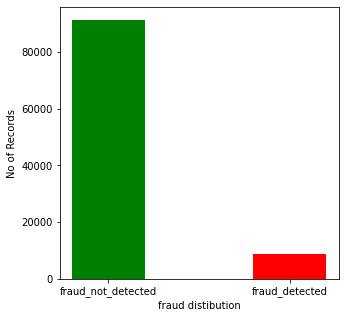

In [19]:
fig=plt.figure(figsize=(5,5))
plt.bar(fraud_transaction_labels,no_of_record_details_of_fraud_detection_results,color=['green','red'],width=0.4)
plt.xlabel('fraud distibution')
plt.ylabel('No of Records')
plt.show()

In [20]:
pandas.DataFrame({'fraud_detection_results':no_of_record_details_of_fraud_detection_results},index=['fraud_not_detected','fraud_detected'])

,fraud_detection_results
fraud_not_detected,91290
fraud_detected,8710


# Observation in target variable distribution



By observing the target variable distribution,87403 records are detected as fraud transaction which is 8.74% very small and 912597 record are not detected as fraud transactions which is 91.2%



# Distribution of all features(Univariate analysis)

# Distribution of distance_from_home

In [21]:
import numpy,math

In [22]:
import seaborn as sns

In [23]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'No of Records')

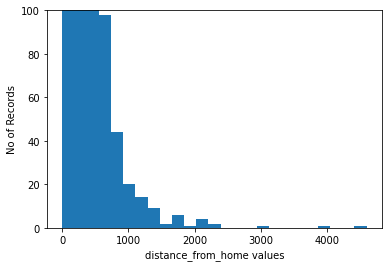

In [24]:
plt.hist(data_set['distance_from_home'],bins=25)
plt.ylim(0,100)
plt.xlabel('distance_from_home values')
plt.ylabel('No of Records')

# distance_from_home distribution having fraud transactions

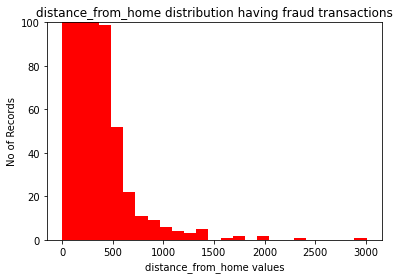

In [25]:
plt.hist(data_set[data_set['fraud']==1]['distance_from_home'],bins=25,color='red')
plt.ylim(0,100)
plt.xlabel('distance_from_home values')
plt.ylabel('No of Records')
plt.title('distance_from_home distribution having fraud transactions')
plt.show()

# distance_from_home distribution for not used chip and having fraud transactions

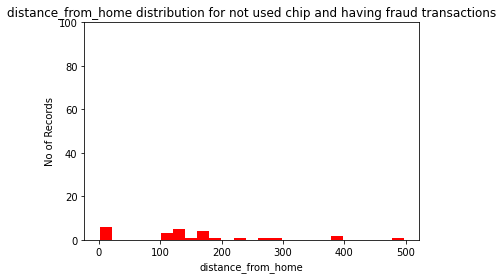

In [26]:
data1=data_set[data_set['used_chip']==0].copy()
data1=data1[data1['used_pin_number']!=0].copy()
plt.hist(data1[data1['fraud']==1]['distance_from_home'],bins=25,color='red')
plt.ylim(0,100)
plt.xlabel('distance_from_home')
plt.ylabel('No of Records')
plt.title('distance_from_home distribution for not used chip and having fraud transactions')
plt.show()

# distance_from_home distribution for not used pin numbers and having fraud transactions

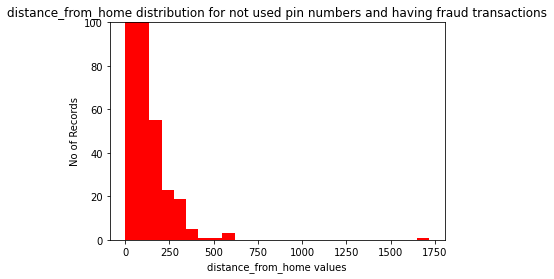

In [27]:
data1=data_set[data_set['used_pin_number']==0].copy()
data1=data1[data1['used_chip']!=0].copy()
plt.hist(data1[data1['fraud']==1]['distance_from_home'],bins=25,color='red')
plt.ylim(0,100)
plt.xlabel('distance_from_home values')
plt.ylabel('No of Records')
plt.title('distance_from_home distribution for not used pin numbers and having fraud transactions')
plt.show()

# distance_from_home distribution for not used both chip and pin numbers and having fraud transactions

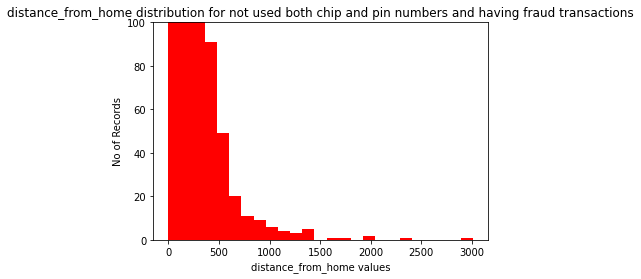

In [28]:
data1=data_set[data_set['used_chip']==0].copy()
data1=data1[data1['used_pin_number']==0].copy()
plt.hist(data1[data1['fraud']==1]['distance_from_home'],bins=25,color='red')
plt.ylim(0,100)
plt.xlabel('distance_from_home values')
plt.ylabel('No of Records')
plt.title('distance_from_home distribution for not used both chip and pin numbers and having fraud transactions')
plt.show()

# distance_from_home distribution for repeat retailer who donot used chip and having fraud transactions

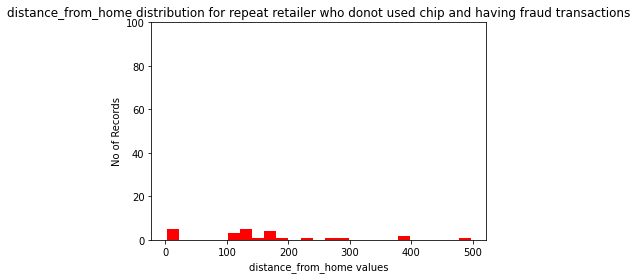

In [29]:
data1=data_set[data_set['used_chip']==0].copy()
data1=data1[data1['used_pin_number']==1].copy()
data1=data1[data1['repeat_retailer']==1].copy()
plt.hist(data1[data1['fraud']==1]['distance_from_home'],bins=25,color='red')
plt.ylim(0,100)
plt.xlabel('distance_from_home values')
plt.ylabel('No of Records')
plt.title('distance_from_home distribution for repeat retailer who donot used chip and having fraud transactions')
plt.show()

# distance_from_home distribution for repeat retailer donot used pin number and having fraud transactions

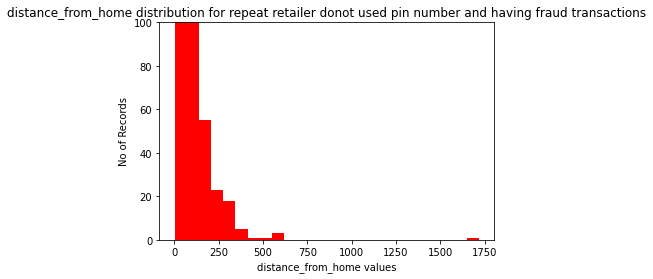

In [30]:
data1=data_set[data_set['used_chip']==1].copy()
data1=data1[data1['used_pin_number']==0].copy()
data1=data1[data1['repeat_retailer']==1].copy()
plt.hist(data1[data1['fraud']==1]['distance_from_home'],bins=25,color='red')
plt.ylim(0,100)
plt.xlabel('distance_from_home values')
plt.ylabel('No of Records')
plt.title('distance_from_home distribution for repeat retailer donot used pin number and having fraud transactions')
plt.show()

# distance_from_home distribution for repeat retailer who donot used both chip and pin number and having fraud transactions

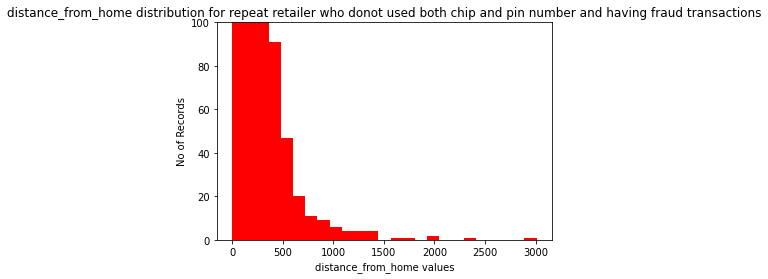

In [31]:
data1=data_set[data_set['used_chip']==0].copy()
data1=data1[data1['used_pin_number']==0].copy()
data1=data1[data1['repeat_retailer']==1].copy()
plt.hist(data1[data1['fraud']==1]['distance_from_home'],bins=25,color='red')
plt.ylim(0,100)
plt.xlabel('distance_from_home values')
plt.ylabel('No of Records')
plt.title('distance_from_home distribution for repeat retailer who donot used both chip and pin number and having fraud transactions')
plt.show()

# distance_from_home distribution for online_order which donot have pin number and having fraud transactions

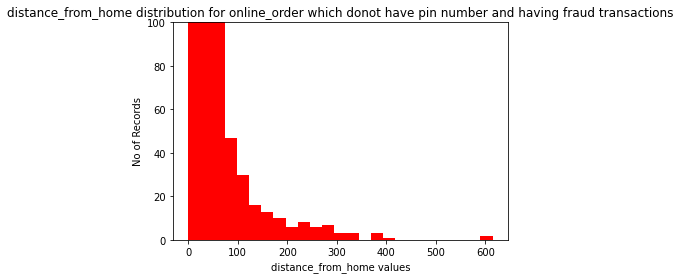

In [32]:
data1=data_set[data_set['used_chip']==1].copy()
data1=data1[data1['used_pin_number']==0].copy()
data1=data1[data1['online_order']==1].copy()
plt.hist(data1[data1['fraud']==1]['distance_from_home'],bins=25,color='red')
plt.ylim(0,100)
plt.xlabel('distance_from_home values')
plt.ylabel('No of Records')
plt.title('distance_from_home distribution for online_order which donot have pin number and having fraud transactions')
plt.show()

# distance_from_home distribution for online_order which donot have used_chip and having fraud transactions

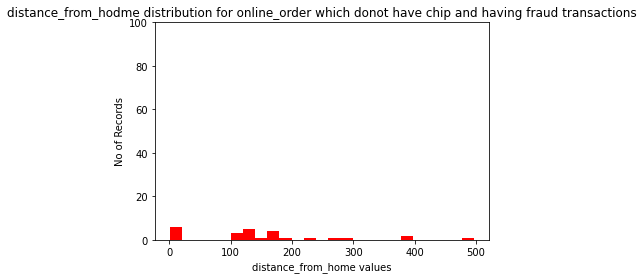

In [33]:
data1=data_set[data_set['used_chip']==0].copy()
data1=data1[data1['used_pin_number']==1].copy()
data1=data1[data1['online_order']==1].copy()
plt.hist(data1[data1['fraud']==1]['distance_from_home'],bins=25,color='red')
plt.ylim(0,100)
plt.xlabel('distance_from_home values')
plt.ylabel('No of Records')
plt.title('distance_from_hodme distribution for online_order which donot have chip and having fraud transactions')
plt.show()

# distance_from_home distribution for online_order which donot have both chip and pin number and having fraud transactions

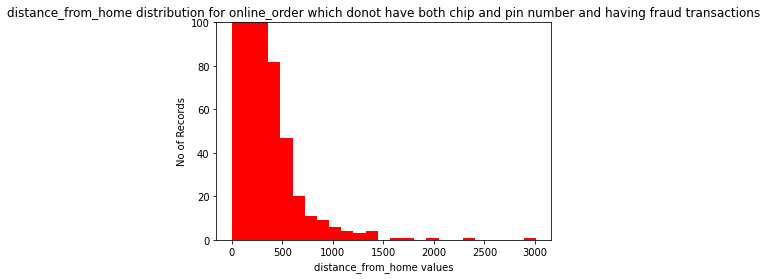

In [34]:
data1=data_set[data_set['used_chip']==0].copy()
data1=data1[data1['used_pin_number']==0].copy()
data1=data1[data1['online_order']==1].copy()
plt.hist(data1[data1['fraud']==1]['distance_from_home'],bins=25,color='red')
plt.ylim(0,100)
plt.xlabel('distance_from_home values')
plt.ylabel('No of Records')
plt.title('distance_from_home distribution for online_order which donot have both chip and pin number and having fraud transactions')
plt.show()

# Observation of distance_from_home distribution:Right skewed



*  As mentioned earlier,data having few outliers and skewed towards lower values that **right skewed** in nature
*   Fraud transaction are mostly causing by  **repeat retailer who donot using both chip and pin numbers and also having online_order in some cases**
*   **Not using of pin number** is creating more impact in fraud detectionthan not using of chip
*   There are more fraud transaction causing for the values of distance_from_home values which are having less than 800




# Distribution of distance_from_last_transaction

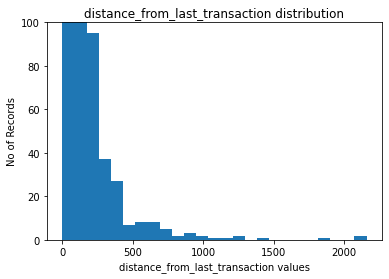

In [35]:
plt.hist(data_set['distance_from_last_transaction'],bins=25)
plt.ylim(0,100)
plt.xlabel('distance_from_last_transaction values')
plt.ylabel('No of Records')
plt.title('distance_from_last_transaction distribution')
plt.show()

# distance_from_last_transaction distribution having fraud transactions

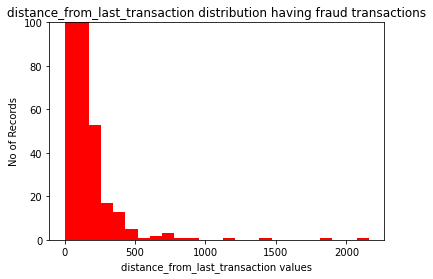

In [36]:
plt.hist(data_set[data_set['fraud']==1]['distance_from_last_transaction'],bins=25,color='red')
plt.ylim(0,100)
plt.xlabel('distance_from_last_transaction values')
plt.ylabel('No of Records')
plt.title('distance_from_last_transaction distribution having fraud transactions')
plt.show()

# distance_from_last_transaction distribution for not used chips and having fraud transactions

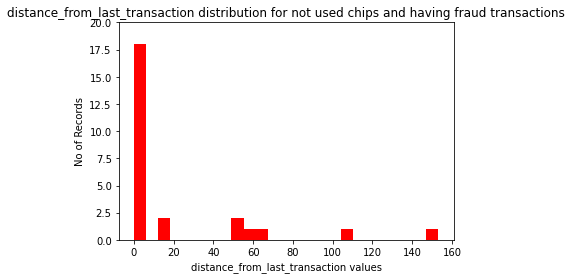

In [37]:
data1=data_set[data_set['used_chip']==0].copy()
data1=data1[data1['used_pin_number']!=0].copy()
plt.hist(data1[data1['fraud']==1]['distance_from_last_transaction'],bins=25,color='red')
plt.ylim(0,20)
plt.xlabel('distance_from_last_transaction values')
plt.ylabel('No of Records')
plt.title('distance_from_last_transaction distribution for not used chips and having fraud transactions')
plt.show()

# distance_from_transaction distribution for not used both chip and pin numbers and having fraud transactions

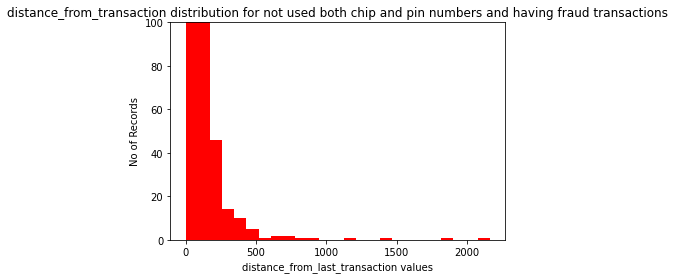

In [38]:
data1=data_set[data_set['used_chip']==0].copy()
data1=data1[data1['used_pin_number']==0].copy()
plt.hist(data1[data1['fraud']==1]['distance_from_last_transaction'],bins=25,color='red')
plt.ylim(0,100)
plt.xlabel('distance_from_last_transaction values')
plt.ylabel('No of Records')
plt.title('distance_from_transaction distribution for not used both chip and pin numbers and having fraud transactions')
plt.show()

# distance_from_last_transaction distribution for not used pin numbers and having fraud transactions

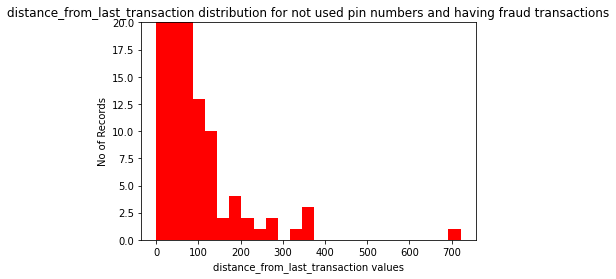

In [39]:
data1=data_set[data_set['used_pin_number']==0].copy()
data1=data1[data1['used_chip']!=0].copy()
plt.hist(data1[data1['fraud']==1]['distance_from_last_transaction'],bins=25,color='red')
plt.ylim(0,20)
plt.xlabel('distance_from_last_transaction values')
plt.ylabel('No of Records')
plt.title('distance_from_last_transaction distribution for not used pin numbers and having fraud transactions')
plt.show()

# distance_from_last_transaction distribution for repeat retailer who donot used chip and having fraud transactions

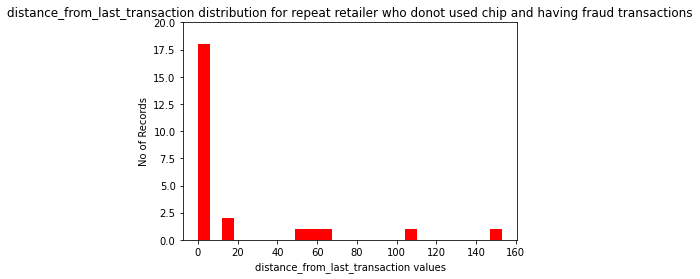

In [40]:
data1=data_set[data_set['used_chip']==0].copy()
data1=data1[data1['used_pin_number']==1].copy()
data1=data1[data1['repeat_retailer']==1].copy()
plt.hist(data1[data1['fraud']==1]['distance_from_last_transaction'],bins=25,color='red')
plt.ylim(0,20)
plt.xlabel('distance_from_last_transaction values')
plt.ylabel('No of Records')
plt.title('distance_from_last_transaction distribution for repeat retailer who donot used chip and having fraud transactions')
plt.show()

# distance_from_last_transaction distribution for repeat retailer who donot used pin number and having fraud transactions

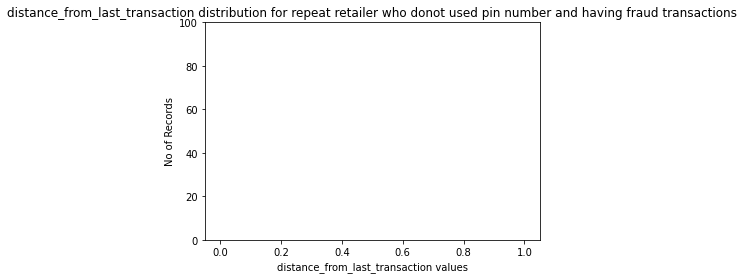

In [41]:
data1=data1[data1['used_chip']==1].copy()
data1=data1[data1['used_pin_number']==0].copy()
data1=data1[data1['repeat_retailer']==1].copy()
plt.hist(data1[data1['fraud']==1]['distance_from_last_transaction'],bins=25,color='red')
plt.ylim(0,100)
plt.xlabel('distance_from_last_transaction values')
plt.ylabel('No of Records')
plt.title('distance_from_last_transaction distribution for repeat retailer who donot used pin number and having fraud transactions')
plt.show()

# distance_from_last_transaction distribution for repeat retailer who not used chip and pin number and having fraud transactions

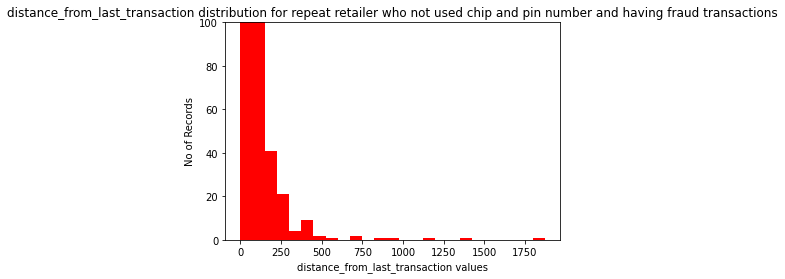

In [42]:
data1=data_set[data_set['used_chip']==0].copy()
data1=data1[data1['used_pin_number']==0].copy()
data1=data1[data1['repeat_retailer']==1].copy()
plt.hist(data1[data1['fraud']==1]['distance_from_last_transaction'],bins=25,color='red')
plt.ylim(0,100)
plt.xlabel('distance_from_last_transaction values')
plt.ylabel('No of Records')
plt.title('distance_from_last_transaction distribution for repeat retailer who not used chip and pin number and having fraud transactions')
plt.show()

# distance_from_last_transaction distribution for online_order which donot having chip and having fraud transactions

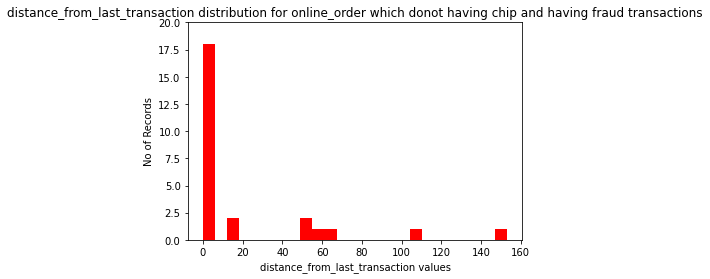

In [43]:
data1=data_set[data_set['used_chip']==0].copy()
data1=data1[data1['used_pin_number']==1].copy()
data1=data1[data1['online_order']==1].copy()
plt.hist(data1[data1['fraud']==1]['distance_from_last_transaction'],bins=25,color='red')
plt.ylim(0,20)
plt.xlabel('distance_from_last_transaction values')
plt.ylabel('No of Records')
plt.title('distance_from_last_transaction distribution for online_order which donot having chip and having fraud transactions')
plt.show()

# distance_from_last_transaction distribution for online_order which donot having pin_number and having fraud transactions

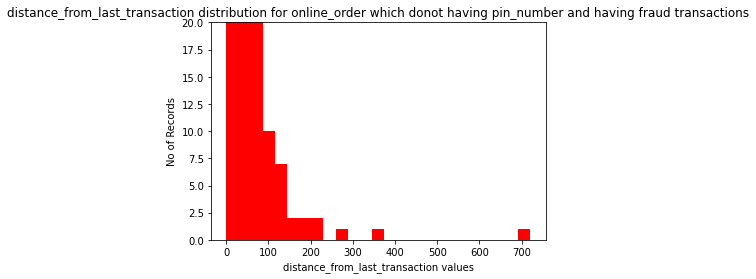

In [44]:
data1=data_set[data_set['used_chip']==1].copy()
data1=data1[data1['used_pin_number']==0].copy()
data1=data1[data1['online_order']==1].copy()
plt.hist(data1[data1['fraud']==1]['distance_from_last_transaction'],bins=25,color='red')
plt.ylim(0,20)
plt.xlabel('distance_from_last_transaction values')
plt.ylabel('No of Records')
plt.title('distance_from_last_transaction distribution for online_order which donot having pin_number and having fraud transactions')
plt.show()

# distance_from_last_transaction distribution for online_order which donot having both chip and pin_number and having fraud transactions

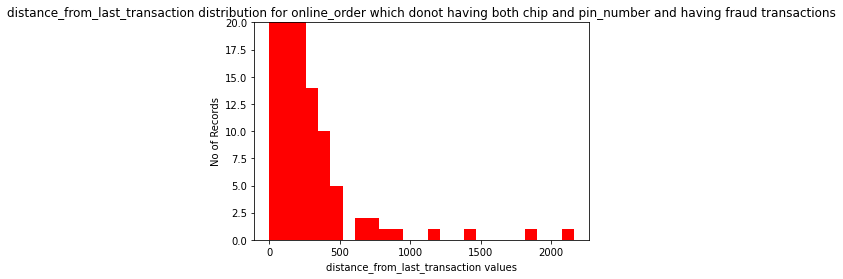

In [45]:
data1=data_set[data_set['used_chip']==0].copy()
data1=data1[data1['used_pin_number']==0].copy()
data1=data1[data1['online_order']==1].copy()
plt.hist(data1[data1['fraud']==1]['distance_from_last_transaction'],bins=25,color='red')
plt.ylim(0,20)
plt.xlabel('distance_from_last_transaction values')
plt.ylabel('No of Records')
plt.title('distance_from_last_transaction distribution for online_order which donot having both chip and pin_number and having fraud transactions')
plt.show()

# Observation of distance_from_last_transaction distribution



*   Data is not uniformly distributed and right skewed
*   Data having some outliers of higher values
*   Fraud transaction are mostly causing by  **repeat retailers donot using both chip and pin numbers**
*   **not using of pin numbers** is creating more impact for detecting fraud transaction in distance_from_last_transaction distribution as well as distance_from_home which we observed previously than used_chip feature.
*   There are more fraud transaction causing for the values of distance_from_last_transaction values which are having less than 250





# Distribution of ratio_to_median_purchase_price	

Text(0, 0.5, 'No of Records')

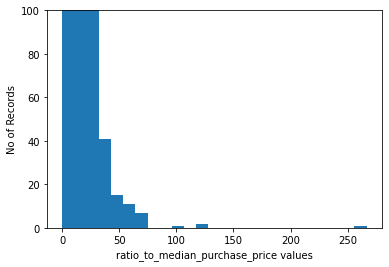

In [46]:
plt.hist(data_set['ratio_to_median_purchase_price'],bins=25)
plt.ylim(0,100)
plt.xlabel('ratio_to_median_purchase_price values')
plt.ylabel('No of Records')

# ratio_to_median_purchase_price distribution having fraud transactions

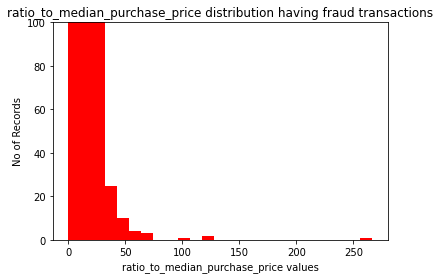

In [47]:
plt.hist(data_set[data_set['fraud']==1]['ratio_to_median_purchase_price'],bins=25,color='red')
plt.ylim(0,100)
plt.xlabel('ratio_to_median_purchase_price values')
plt.ylabel('No of Records')
plt.title('ratio_to_median_purchase_price distribution having fraud transactions')
plt.show()

# ratio_to_median_purchase_price distribution for not used chips and having fraud transactions

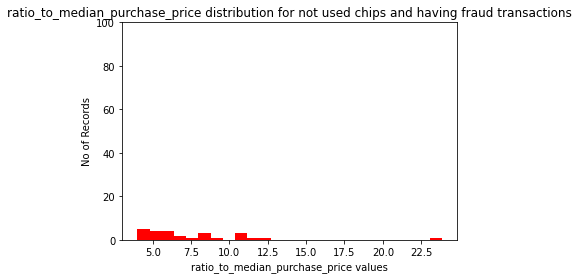

In [48]:
data1=data_set[data_set['used_chip']==0].copy()
data1=data1[data1['used_pin_number']!=0].copy()
plt.hist(data1[data1['fraud']==1]['ratio_to_median_purchase_price'],bins=25,color='red')
plt.ylim(0,100)
plt.xlabel('ratio_to_median_purchase_price values')
plt.ylabel('No of Records')
plt.title('ratio_to_median_purchase_price distribution for not used chips and having fraud transactions')
plt.show()

# ratio_to_median_purchase_price distribution for not used pin numbers and having fraud transactions

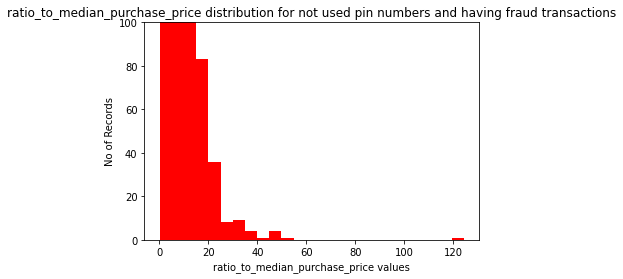

In [49]:
data1=data_set[data_set['used_pin_number']==0].copy()
data1=data1[data1['used_chip']!=0].copy()
plt.hist(data1[data1['fraud']==1]['ratio_to_median_purchase_price'],bins=25,color='red')
plt.ylim(0,100)
plt.xlabel('ratio_to_median_purchase_price values')
plt.ylabel('No of Records')
plt.title('ratio_to_median_purchase_price distribution for not used pin numbers and having fraud transactions')
plt.show()

# ratio_to_median_purchase_price distribution for not used both chip and pin numbers and having fraud transactions

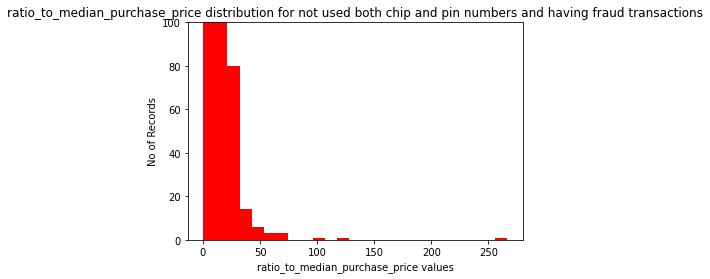

In [50]:
data1=data_set[data_set['used_chip']==0].copy()
data1=data1[data1['used_pin_number']==0].copy()
plt.hist(data1[data1['fraud']==1]['ratio_to_median_purchase_price'],bins=25,color='red')
plt.ylim(0,100)
plt.xlabel('ratio_to_median_purchase_price values')
plt.ylabel('No of Records')
plt.title('ratio_to_median_purchase_price distribution for not used both chip and pin numbers and having fraud transactions')
plt.show()

# ratio_to_median_purchase_price distribution for repeat retailer who donot used chip and having fraud transactions

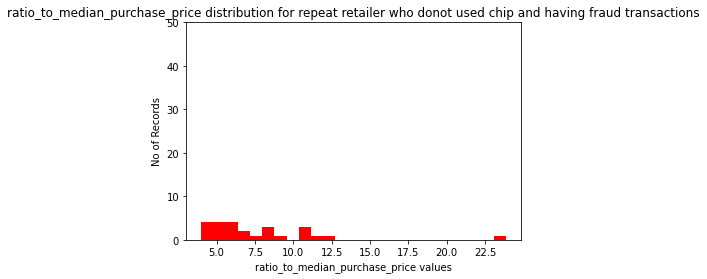

In [51]:
data1=data_set[data_set['used_chip']==0].copy()
data1=data1[data1['used_pin_number']==1].copy()
data1=data1[data1['repeat_retailer']==1].copy()
plt.hist(data1[data1['fraud']==1]['ratio_to_median_purchase_price'],bins=25,color='red')
plt.ylim(0,50)
plt.xlabel('ratio_to_median_purchase_price values')
plt.ylabel('No of Records')
plt.title('ratio_to_median_purchase_price distribution for repeat retailer who donot used chip and having fraud transactions')
plt.show()

# ratio_to_median_purchase_price distribution for repeat retailer who donot used pin numbers and having fraud transactions

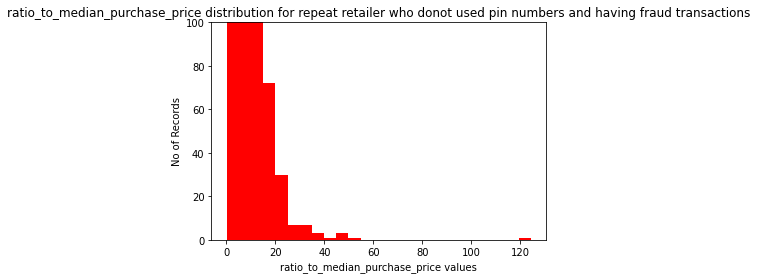

In [52]:
data1=data_set[data_set['used_chip']==1].copy()
data1=data1[data1['used_pin_number']==0].copy()
data1=data1[data1['repeat_retailer']==1].copy()
plt.hist(data1[data1['fraud']==1]['ratio_to_median_purchase_price'],bins=25,color='red')
plt.ylim(0,100)
plt.xlabel('ratio_to_median_purchase_price values')
plt.ylabel('No of Records')
plt.title('ratio_to_median_purchase_price distribution for repeat retailer who donot used pin numbers and having fraud transactions')
plt.show()

# ratio_to_median_purchase_price distribution for repeat retailer who donot used both chip and pin numbers and having fraud transactions

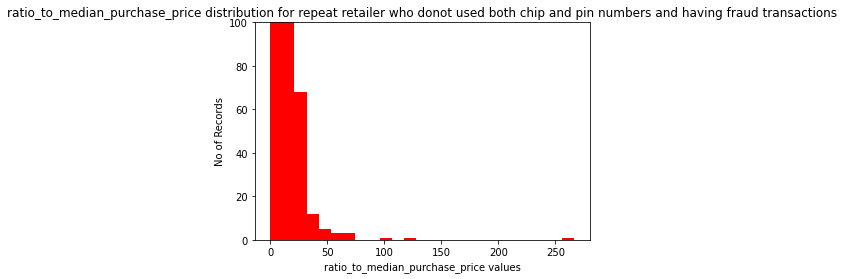

In [53]:
data1=data_set[data_set['used_chip']==0].copy()
data1=data1[data1['used_pin_number']==0].copy()
data1=data1[data1['repeat_retailer']==1].copy()
plt.hist(data1[data1['fraud']==1]['ratio_to_median_purchase_price'],bins=25,color='red')
plt.ylim(0,100)
plt.xlabel('ratio_to_median_purchase_price values')
plt.ylabel('No of Records')
plt.title('ratio_to_median_purchase_price distribution for repeat retailer who donot used both chip and pin numbers and having fraud transactions')
plt.show()

# ratio_to_median_purchase_price distribution for online_order which donot have chip and having fraud transactions

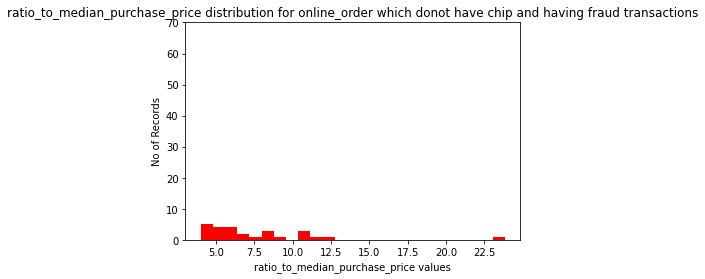

In [54]:
data1=data_set[data_set['used_chip']==0].copy()
data1=data1[data1['used_pin_number']==1].copy()
data1=data1[data1['online_order']==1].copy()
plt.hist(data1[data1['fraud']==1]['ratio_to_median_purchase_price'],bins=25,color='red')
plt.ylim(0,70)
plt.xlabel('ratio_to_median_purchase_price values')
plt.ylabel('No of Records')
plt.title('ratio_to_median_purchase_price distribution for online_order which donot have chip and having fraud transactions')
plt.show()

# ratio_to_median_purchase_price distribution for online_order which donot have pin_number and having fraud transactions

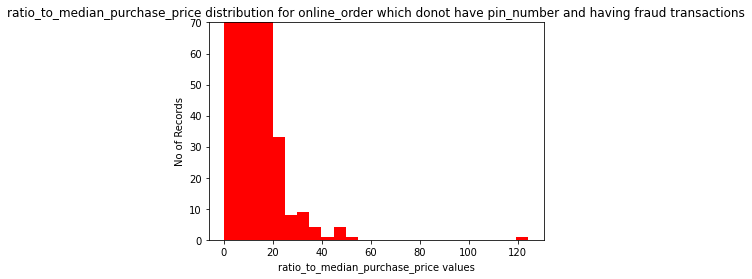

In [55]:
data1=data_set[data_set['used_chip']==1].copy()
data1=data1[data1['used_pin_number']==0].copy()
data1=data1[data1['online_order']==1].copy()
plt.hist(data1[data1['fraud']==1]['ratio_to_median_purchase_price'],bins=25,color='red')
plt.ylim(0,70)
plt.xlabel('ratio_to_median_purchase_price values')
plt.ylabel('No of Records')
plt.title('ratio_to_median_purchase_price distribution for online_order which donot have pin_number and having fraud transactions')
plt.show()

# ratio_to_median_purchase_price distribution for online_order which donot have both chip and pin_number and having fraud transactions

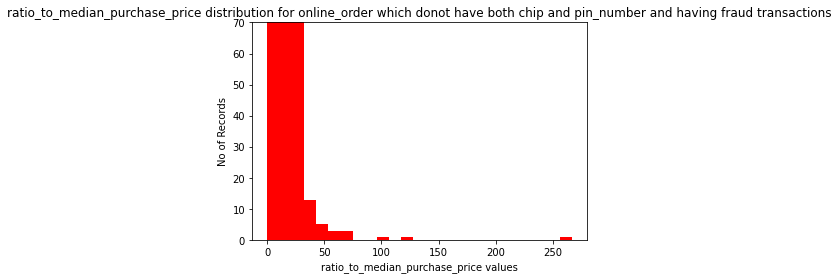

In [56]:
data1=data_set[data_set['used_chip']==0].copy()
data1=data1[data1['used_pin_number']==0].copy()
data1=data1[data1['online_order']==1].copy()
plt.hist(data1[data1['fraud']==1]['ratio_to_median_purchase_price'],bins=25,color='red')
plt.ylim(0,70)
plt.xlabel('ratio_to_median_purchase_price values')
plt.ylabel('No of Records')
plt.title('ratio_to_median_purchase_price distribution for online_order which donot have both chip and pin_number and having fraud transactions')
plt.show()

# Observation of ratio_to_median_purchase_price Distribution

* Data is skewed towards right and having outliers of higher values
* For **ratio_to_median_purchase_price**,fraud transaction is mostly influenced by **used_pin_number** which **used_pin_number=0**
* Fraud detection is more in the case of repeat_retailers and online_ordered which used_pin_number and used_chip are equal to zero



# Distribution of repeat_retailer

In [57]:
data_set['repeat_retailer'].value_counts()

1    88209
0    11791
Name: repeat_retailer, dtype: int64

In [58]:
no_of_repeat_retailer_results=list(data_set['repeat_retailer'].value_counts())

In [59]:
repeat_retailer_labels=['repeat_retailer','not_repeat_retailer']

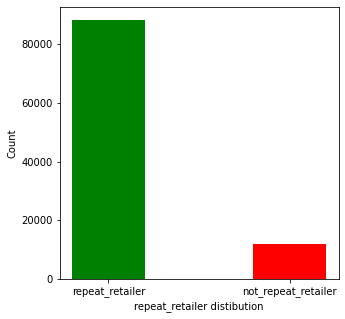

In [60]:
fig=plt.figure(figsize=(5,5))
plt.bar(repeat_retailer_labels,no_of_repeat_retailer_results,color=['green','red'],width=0.4)
plt.xlabel('repeat_retailer distibution')
plt.ylabel('Count')
plt.show()

In [61]:
pandas.DataFrame({'repeat_retailer_counts':no_of_repeat_retailer_results},index=['repeat_retailer','not_repeat_retailer'])

,repeat_retailer_counts
repeat_retailer,88209
not_repeat_retailer,11791


# Comparison of fraud_detection(fraud=1) with repeat retailer and not repeat retailer

In [62]:
data_of_repeat_retailer=len(data_set[data_set['repeat_retailer']==1])
data_of_not_repeat_retailer=len(data_set[data_set['repeat_retailer']==0])
percentage_of_repeat_retailer=int(data_of_repeat_retailer/len(data_set)*100)

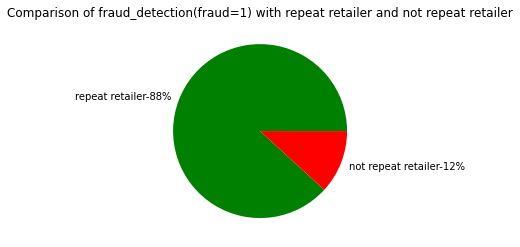

In [63]:
plt.pie([data_of_repeat_retailer,data_of_not_repeat_retailer],labels=['repeat retailer-'+str(percentage_of_repeat_retailer)+'%','not repeat retailer-'+str(100-percentage_of_repeat_retailer)+'%'],colors=['green','red'])
plt.title('Comparison of fraud_detection(fraud=1) with repeat retailer and not repeat retailer')
plt.show()

# Observation in repeat_retailer distribution

There are 881536(88%) repeat_retailers out of 1000000 records.**Majority of the data** comes under the category of repeat_retailers 

# Distribution of used_chip

In [64]:
data_set['used_chip'].value_counts()

0    64894
1    35106
Name: used_chip, dtype: int64

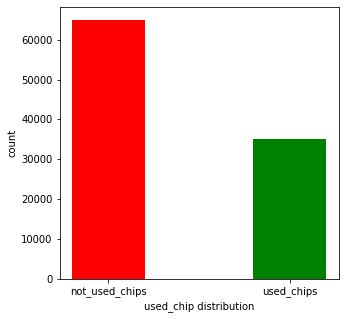

In [65]:
used_chips_details=list(data_set['used_chip'].value_counts())
used_chip_labels=['not_used_chips','used_chips']
fig=plt.figure(figsize=(5,5))
plt.bar(used_chip_labels,used_chips_details,color=['red','green'],width=0.4)
plt.xlabel('used_chip distribution')
plt.ylabel('count')
plt.show()

In [66]:
pandas.DataFrame({'used_chip_details':used_chips_details},index=used_chip_labels)

,used_chip_details
not_used_chips,64894
used_chips,35106


# Comparison of fraud_detection(fraud-1) with used chip and not used chip

In [67]:
data_used_chip=len(data_set[data_set['used_chip']==1])
data_not_used_chip=len(data_set[data_set['used_chip']==0])
percentage_of_data_used_chip=math.ceil(data_used_chip/len(data_set)*100)

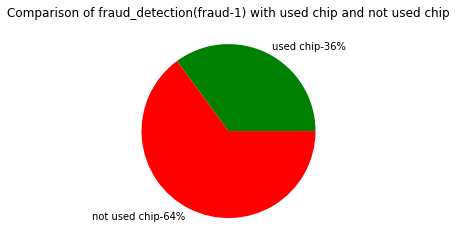

In [68]:
plt.pie([data_used_chip,data_not_used_chip],labels=['used chip-'+str(percentage_of_data_used_chip)+'%','not used chip-'+str(100-percentage_of_data_used_chip)+'%'],colors=['green','red'])
plt.title('Comparison of fraud_detection(fraud-1) with used chip and not used chip')
plt.show()

# Observation of used_chip distribution

350399(36%) rows areb recorded as used chips and 649601(64%) are not recorded as used chips

# Distribution of used_pin_number

In [69]:
data_set['used_pin_number'].value_counts()

0    89675
1    10325
Name: used_pin_number, dtype: int64

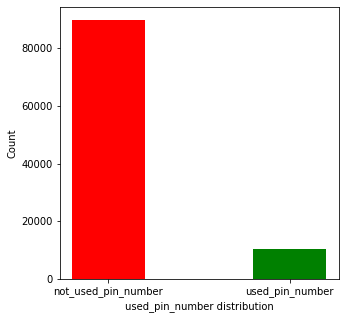

In [70]:
used_pin_number_details=list(data_set['used_pin_number'].value_counts())
used_pin_number_labels=['not_used_pin_number','used_pin_number']
fig=plt.figure(figsize=(5,5))
plt.bar(used_pin_number_labels,used_pin_number_details,color=['red','green'],width=0.4)
plt.xlabel('used_pin_number distribution')
plt.ylabel('Count')
plt.show()

In [71]:
pandas.DataFrame({'used_pin_number':used_pin_number_details},index=used_pin_number_labels)

,used_pin_number
not_used_pin_number,89675
used_pin_number,10325


# Comparison of fraud_detection(fraud=1) with used pin number and not used pin number

In [72]:
data_used_pin_number=len(data_set[data_set['used_pin_number']==1])
data_not_used_pin_number=len(data_set[data_set['used_pin_number']==0])
percentage_of_data_used_pin_number=int(data_used_pin_number/len(data_set)*100)

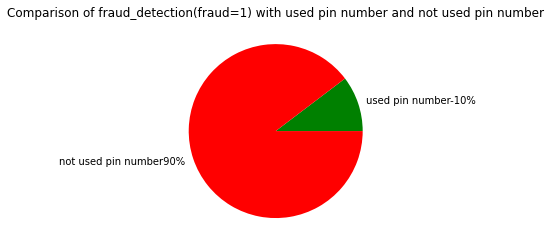

In [73]:
plt.pie([data_used_pin_number,data_not_used_pin_number],labels=['used pin number-'+str(percentage_of_data_used_pin_number)+'%','not used pin number'+str(100-percentage_of_data_used_pin_number)+'%'],colors=['green','red'])
plt.title('Comparison of fraud_detection(fraud=1) with used pin number and not used pin number')
plt.show()

# Observation of used_pin_number distribution


100608(10%) rows are recorded as used pin numbers and 899392(90%) rows are not recorded as used pin numbers.Pin numbers are used in **very small amount**

# Distribution of online_order

In [74]:
data_set['online_order'].value_counts()

1    65066
0    34934
Name: online_order, dtype: int64

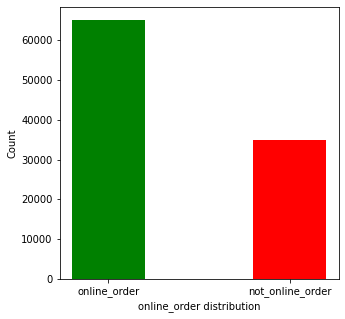

In [75]:
online_order_details=list(data_set['online_order'].value_counts())
online_order_labels=['online_order','not_online_order']
fig=plt.figure(figsize=(5,5))
plt.bar(online_order_labels,online_order_details,color=['green','red'],width=0.4)
plt.xlabel('online_order distribution')
plt.ylabel('Count')
plt.show()

In [76]:
pandas.DataFrame({'online_order_details':online_order_details},index=online_order_labels)

,online_order_details
online_order,65066
not_online_order,34934


# Observation of used_pin_number distribution

650552(65%) online_order rows are having value 1 and 349448(35%) rows are having value 0

# Bivariate Analysis

# distance_from_home vs distance_from_last_transaction

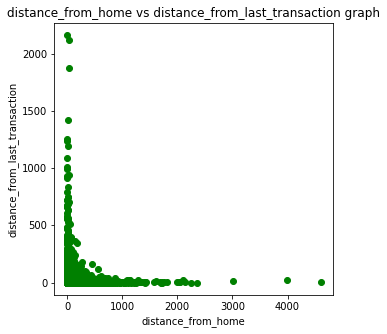

In [77]:
plt.figure(figsize=(5,5))
plt.scatter(data_set['distance_from_home'],data_set['distance_from_last_transaction'],color='green')
plt.xlabel('distance_from_home')
plt.ylabel('distance_from_last_transaction')
plt.title('distance_from_home vs distance_from_last_transaction graph')
plt.show()

# distance_from_home vs distance_from_last_transaction graph where fraud transaction took place

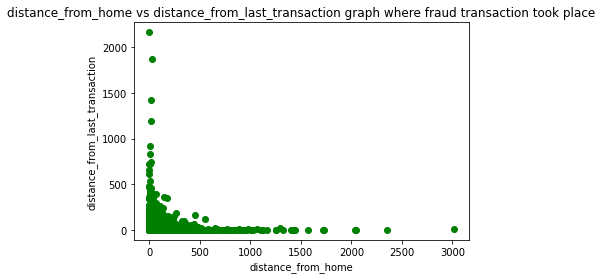

In [78]:
plt.scatter(data_set[data_set['fraud']==1]['distance_from_home'],data_set[data_set['fraud']==1]['distance_from_last_transaction'],color='green')
plt.xlabel('distance_from_home')
plt.ylabel('distance_from_last_transaction')
plt.title('distance_from_home vs distance_from_last_transaction graph where fraud transaction took place')
plt.show()

# distance_from_home vs distance_from_last_transaction graph for fraud transaction done without using chip

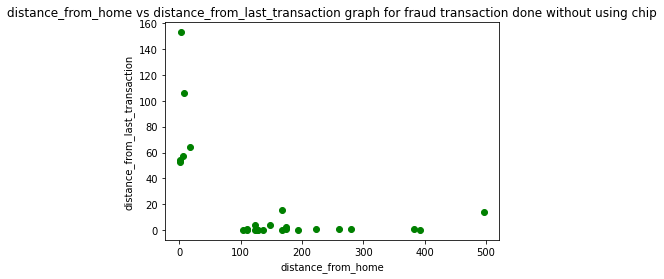

In [79]:
data1=data_set[data_set['used_chip']==0].copy()
data1=data1[data1['used_pin_number']!=0].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_home'],data1[data1['fraud']==1]['distance_from_last_transaction'],color='green')
plt.xlabel('distance_from_home')
plt.ylabel('distance_from_last_transaction')
plt.title('distance_from_home vs distance_from_last_transaction graph for fraud transaction done without using chip')
plt.show()

# distance_from_home vs distance_from_last_transaction graph for fraud transaction done without using pin number

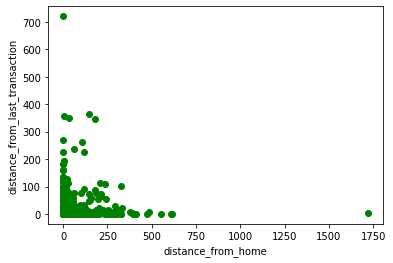

In [80]:
data1=data_set[data_set['used_pin_number']==0].copy()
data1=data1[data1['used_chip']!=0].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_home'],data1[data1['fraud']==1]['distance_from_last_transaction'],color='green')
plt.xlabel('distance_from_home')
plt.ylabel('distance_from_last_transaction')
plt.title('')
plt.show()

# distance_from_home vs distance_from_last_transaction graph for fraud transaction done without using both pin number and chip

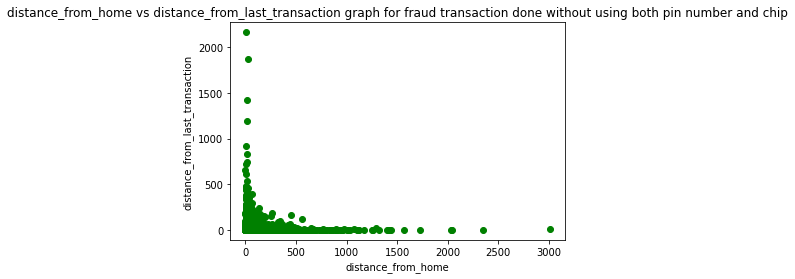

In [81]:
data1=data_set[data_set['used_chip']==0].copy()
data1=data1[data1['used_pin_number']==0].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_home'],data1[data1['fraud']==1]['distance_from_last_transaction'],color='green')
plt.xlabel('distance_from_home')
plt.ylabel('distance_from_last_transaction')
plt.title('distance_from_home vs distance_from_last_transaction graph for fraud transaction done without using both pin number and chip')
plt.show()

# distance_from_home vs distance_from_last_transaction graph for fraud transaction which is online ordered and not using chip

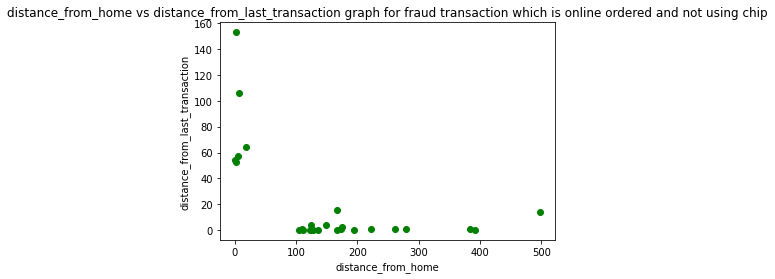

In [82]:
data1=data_set[data_set['used_pin_number']==1].copy()

data1=data1[data1['used_chip']==0].copy()
data1=data1[data1['online_order']==1].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_home'],data1[data1['fraud']==1]['distance_from_last_transaction'],color='green')
plt.xlabel('distance_from_home')
plt.ylabel('distance_from_last_transaction')
plt.title('distance_from_home vs distance_from_last_transaction graph for fraud transaction which is online ordered and not using chip')
plt.show()

# distance_from_home vs distance_from_last_transaction graph for fraud transaction which is online ordered and not using pin number

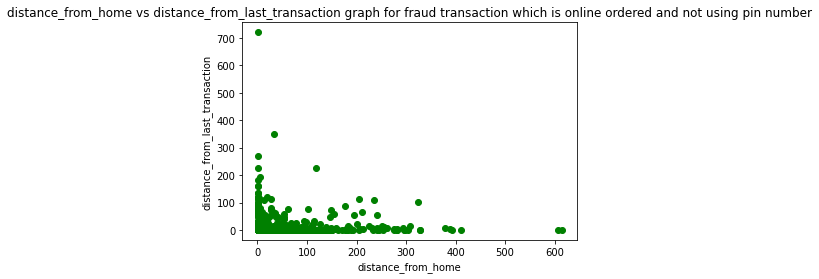

In [83]:
data1=data_set[data_set['used_pin_number']==0].copy()
data1=data1[data1['used_chip']==1].copy()
data1=data1[data1['online_order']==1].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_home'],data1[data1['fraud']==1]['distance_from_last_transaction'],color='green')
plt.xlabel('distance_from_home')
plt.ylabel('distance_from_last_transaction')
plt.title('distance_from_home vs distance_from_last_transaction graph for fraud transaction which is online ordered and not using pin number')
plt.show()

# distance_from_home vs distance_from_last_transaction graph for fraud transaction which is online ordered and not using both chip and pin number

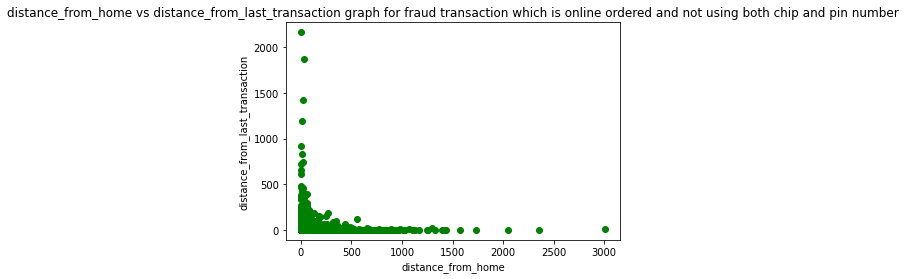

In [84]:
data1=data_set[data_set['used_pin_number']==0].copy()
data1=data1[data1['used_chip']==0].copy()
data1=data1[data1['online_order']==1].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_home'],data1[data1['fraud']==1]['distance_from_last_transaction'],color='green')
plt.xlabel('distance_from_home')
plt.ylabel('distance_from_last_transaction')
plt.title('distance_from_home vs distance_from_last_transaction graph for fraud transaction which is online ordered and not using both chip and pin number')
plt.show()

# distance_from_home vs distance_from_last_transaction graph for fraud transaction by repeat retailers and not using chip

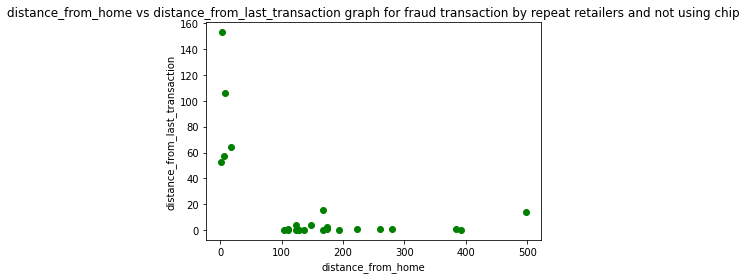

In [85]:
data1=data_set[data_set['used_pin_number']==1].copy()
data1=data1[data1['used_chip']==0].copy()
data1=data1[data1['repeat_retailer']==1].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_home'],data1[data1['fraud']==1]['distance_from_last_transaction'],color='green')
plt.xlabel('distance_from_home')
plt.ylabel('distance_from_last_transaction')
plt.title('distance_from_home vs distance_from_last_transaction graph for fraud transaction by repeat retailers and not using chip')
plt.show()

# distance_from_home vs distance_from_last_transaction graph for fraud transaction by repeat retailers and not using pin number

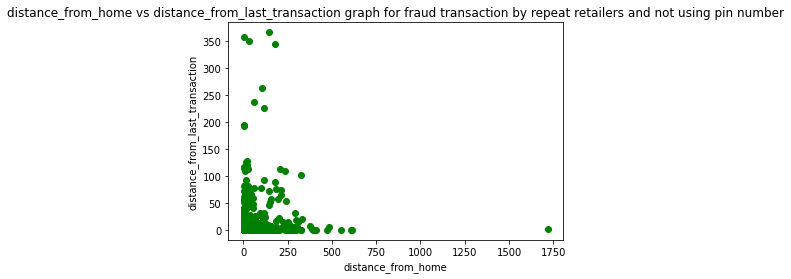

In [86]:
data1=data_set[data_set['used_pin_number']==0].copy()
data1=data1[data1['used_chip']==1].copy()
data1=data1[data1['repeat_retailer']==1].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_home'],data1[data1['fraud']==1]['distance_from_last_transaction'],color='green')
plt.xlabel('distance_from_home')
plt.ylabel('distance_from_last_transaction')
plt.title('distance_from_home vs distance_from_last_transaction graph for fraud transaction by repeat retailers and not using pin number')
plt.show()

# distance_from_home vs distance_from_last_transaction graph for fraud transaction by repeat retailers and not using both chip and pin number

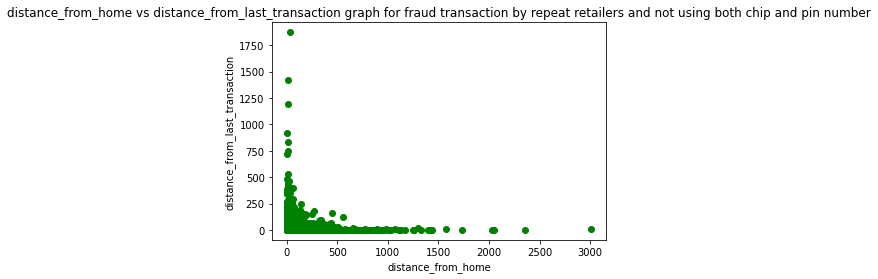

In [87]:
data1=data_set[data_set['used_pin_number']==0].copy()
data1=data1[data1['used_chip']==0].copy()
data1=data1[data1['repeat_retailer']==1].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_home'],data1[data1['fraud']==1]['distance_from_last_transaction'],color='green')
plt.xlabel('distance_from_home')
plt.ylabel('distance_from_last_transaction')
plt.title('distance_from_home vs distance_from_last_transaction graph for fraud transaction by repeat retailers and not using both chip and pin number')
plt.show()

# Distribution of distance_from_last_transaction vs ratio_to_median_purchase_price

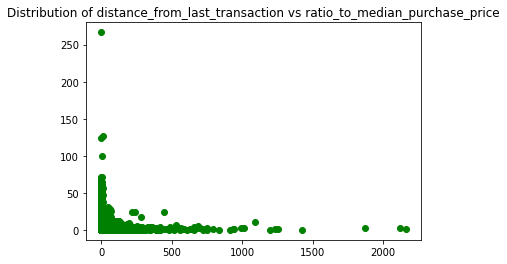

In [88]:
plt.scatter(data_set['distance_from_last_transaction'],data_set['ratio_to_median_purchase_price'],color='green')
plt.title('Distribution of distance_from_last_transaction vs ratio_to_median_purchase_price')
plt.show()

# distance_from_last_transaction vs ratio_to_median_purchase_price graph where fraud transaction took place

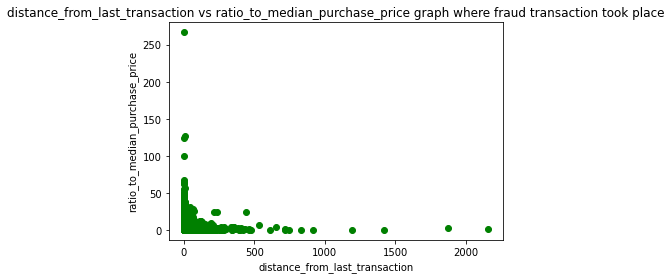

In [89]:
plt.scatter(data_set[data_set['fraud']==1]['distance_from_last_transaction'],data_set[data_set['fraud']==1]['ratio_to_median_purchase_price'],color='green')
plt.xlabel('distance_from_last_transaction')
plt.ylabel('ratio_to_median_purchase_price')
plt.title('distance_from_last_transaction vs ratio_to_median_purchase_price graph where fraud transaction took place')
plt.show()

# distance_from_last_transaction vs ratio_to_median_purchase_price graph for fraud transaction done without using chip

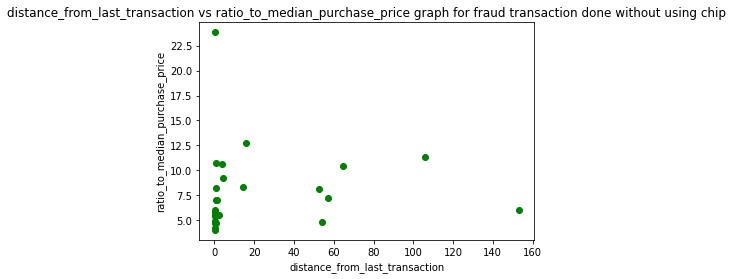

In [90]:
data1=data_set[data_set['used_chip']==0].copy()
data1=data1[data1['used_pin_number']!=0].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_last_transaction'],data1[data1['fraud']==1]['ratio_to_median_purchase_price'],color='green')
plt.xlabel('distance_from_last_transaction')
plt.ylabel('ratio_to_median_purchase_price')
plt.title('distance_from_last_transaction vs ratio_to_median_purchase_price graph for fraud transaction done without using chip')
plt.show()

# distance_from_last_transaction vs ratio_to_median_purchase_price graph for fraud transaction done without using pin number

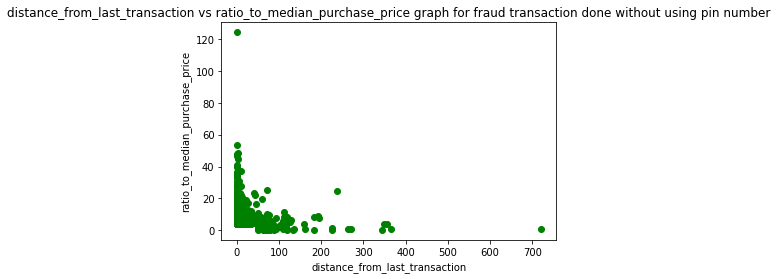

In [91]:
data1=data_set[data_set['used_chip']!=0].copy()
data1=data1[data1['used_pin_number']==0].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_last_transaction'],data1[data1['fraud']==1]['ratio_to_median_purchase_price'],color='green')
plt.xlabel('distance_from_last_transaction')
plt.ylabel('ratio_to_median_purchase_price')
plt.title('distance_from_last_transaction vs ratio_to_median_purchase_price graph for fraud transaction done without using pin number')
plt.show() 

# distance_from_last_transaction vs ratio_to_median_purchase_price graph for fraud transaction done without using both chip and pin number

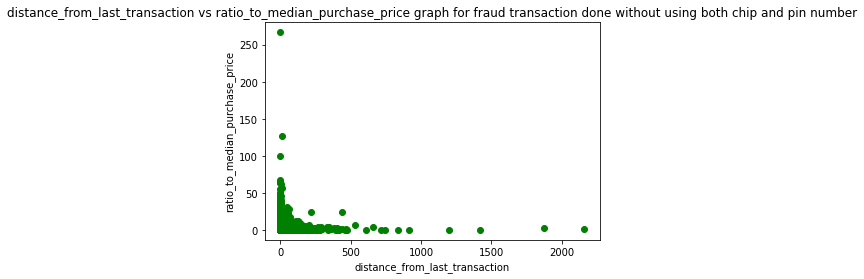

In [92]:
data1=data_set[data_set['used_chip']==0].copy()
data1=data1[data1['used_pin_number']==0].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_last_transaction'],data1[data1['fraud']==1]['ratio_to_median_purchase_price'],color='green')
plt.xlabel('distance_from_last_transaction')
plt.ylabel('ratio_to_median_purchase_price')
plt.title('distance_from_last_transaction vs ratio_to_median_purchase_price graph for fraud transaction done without using both chip and pin number')
plt.show() 

# distance_from_last_transaction vs ratio_to_median_purchase_price graph for fraud transaction which is online ordered without using both chip and pin_number

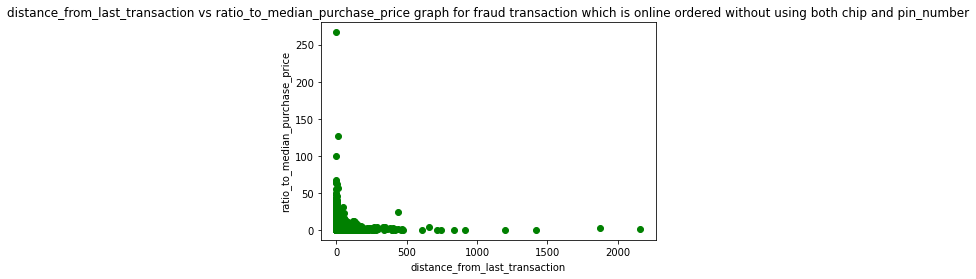

In [93]:
data1=data_set[data_set['used_pin_number']==0].copy()
data1=data1[data1['used_chip']==0].copy()
data1=data1[data1['online_order']==1].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_last_transaction'],data1[data1['fraud']==1]['ratio_to_median_purchase_price'],color='green')
plt.xlabel('distance_from_last_transaction')
plt.ylabel('ratio_to_median_purchase_price')
plt.title('distance_from_last_transaction vs ratio_to_median_purchase_price graph for fraud transaction which is online ordered without using both chip and pin_number')
plt.show()

# distance_from_last_transaction vs ratio_to_median_purchase_price graph for fraud transaction which is online ordered without using chip

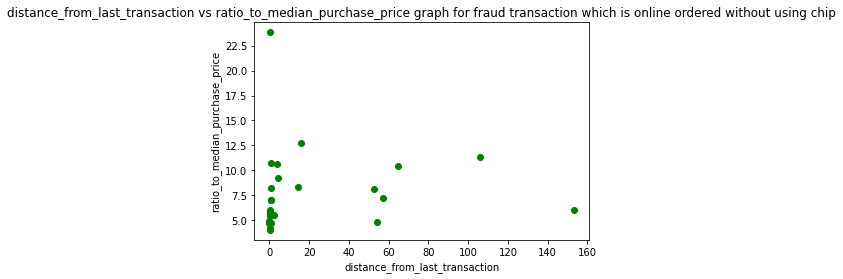

In [94]:
data1=data_set[data_set['used_pin_number']==1].copy()
data1=data1[data1['used_chip']==0].copy()
data1=data1[data1['online_order']==1].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_last_transaction'],data1[data1['fraud']==1]['ratio_to_median_purchase_price'],color='green')
plt.xlabel('distance_from_last_transaction')
plt.ylabel('ratio_to_median_purchase_price')
plt.title('distance_from_last_transaction vs ratio_to_median_purchase_price graph for fraud transaction which is online ordered without using chip')
plt.show()

# distance_from_last_transaction vs ratio_to_median_purchase_price graph for fraud transaction which is online ordered without using pin number

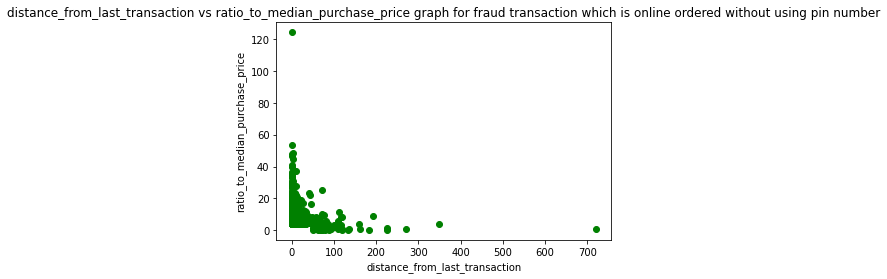

In [95]:
data1=data_set[data_set['used_pin_number']==0].copy()
data1=data1[data1['used_chip']==1].copy()
data1=data1[data1['online_order']==1].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_last_transaction'],data1[data1['fraud']==1]['ratio_to_median_purchase_price'],color='green')
plt.xlabel('distance_from_last_transaction')
plt.ylabel('ratio_to_median_purchase_price')
plt.title('distance_from_last_transaction vs ratio_to_median_purchase_price graph for fraud transaction which is online ordered without using pin number')
plt.show()

# distance_from_last_transaction vs ratio_to_median_purchase_price graph for fraud transaction by repeat_retailers without using chip

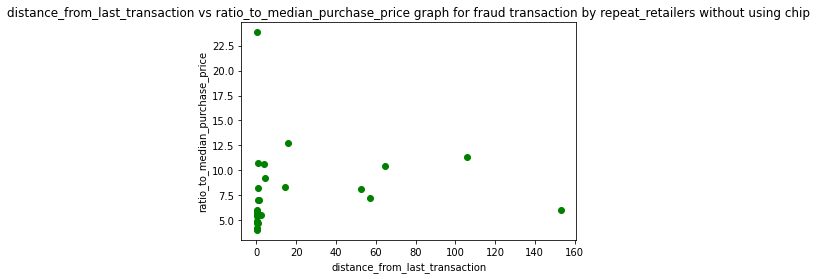

In [96]:
data1=data_set[data_set['used_pin_number']==1].copy()
data1=data1[data1['used_chip']==0].copy()
data1=data1[data1['repeat_retailer']==1].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_last_transaction'],data1[data1['fraud']==1]['ratio_to_median_purchase_price'],color='green')
plt.xlabel('distance_from_last_transaction')
plt.ylabel('ratio_to_median_purchase_price')
plt.title('distance_from_last_transaction vs ratio_to_median_purchase_price graph for fraud transaction by repeat_retailers without using chip')
plt.show()

# distance_from_last_transaction vs ratio_to_median_purchase_price graph for fraud transaction by repeat_retailers without using pin number

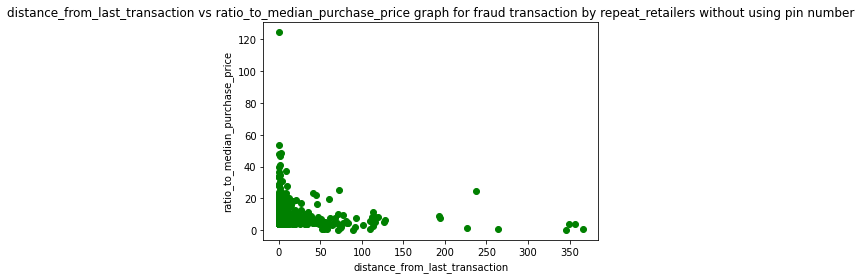

In [97]:
data1=data_set[data_set['used_pin_number']==0].copy()
data1=data1[data1['used_chip']==1].copy()
data1=data1[data1['repeat_retailer']==1].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_last_transaction'],data1[data1['fraud']==1]['ratio_to_median_purchase_price'],color='green')
plt.xlabel('distance_from_last_transaction')
plt.ylabel('ratio_to_median_purchase_price')
plt.title('distance_from_last_transaction vs ratio_to_median_purchase_price graph for fraud transaction by repeat_retailers without using pin number')
plt.show()

# distance_from_last_transaction vs ratio_to_median_purchase_price graph for fraud transaction by repeat_retailers without using both chip and pin number

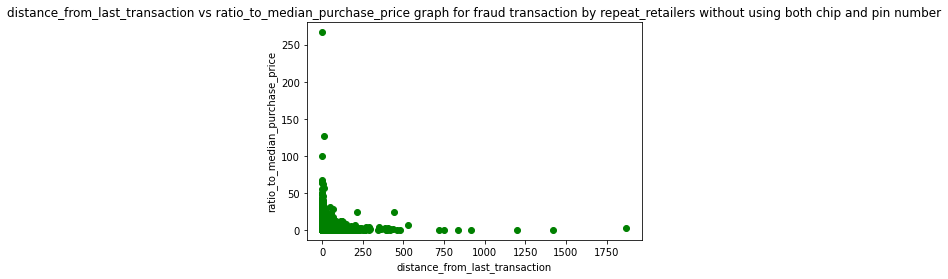

In [98]:
data1=data_set[data_set['used_pin_number']==0].copy()
data1=data1[data1['used_chip']==0].copy()
data1=data1[data1['repeat_retailer']==1].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_last_transaction'],data1[data1['fraud']==1]['ratio_to_median_purchase_price'],color='green')
plt.xlabel('distance_from_last_transaction')
plt.ylabel('ratio_to_median_purchase_price')
plt.title('distance_from_last_transaction vs ratio_to_median_purchase_price graph for fraud transaction by repeat_retailers without using both chip and pin number')
plt.show()

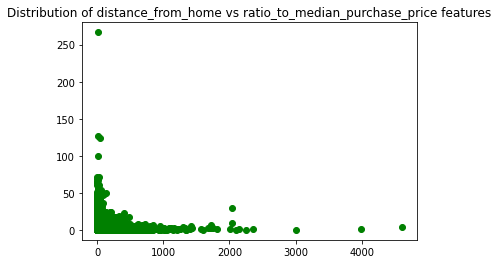

In [99]:
plt.scatter(data_set['distance_from_home'],data_set['ratio_to_median_purchase_price'],color='green')
plt.title('Distribution of distance_from_home vs ratio_to_median_purchase_price features')
plt.show()

# distance_from_home vs ratio_to_median_purchase_price graph where fraud transaction took place

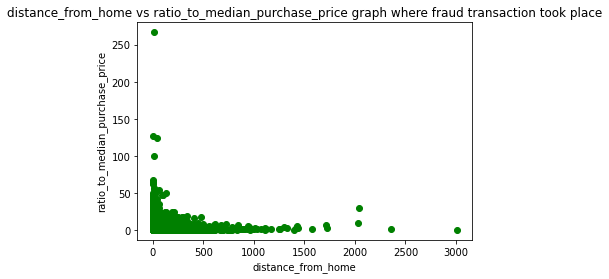

In [100]:
plt.scatter(data_set[data_set['fraud']==1]['distance_from_home'],data_set[data_set['fraud']==1]['ratio_to_median_purchase_price'],color='green')
plt.xlabel('distance_from_home')
plt.ylabel('ratio_to_median_purchase_price')
plt.title('distance_from_home vs ratio_to_median_purchase_price graph where fraud transaction took place')
plt.show()

# distance_from_home vs ratio_to_median_purchase_price graph for fraud transaction done without using chip

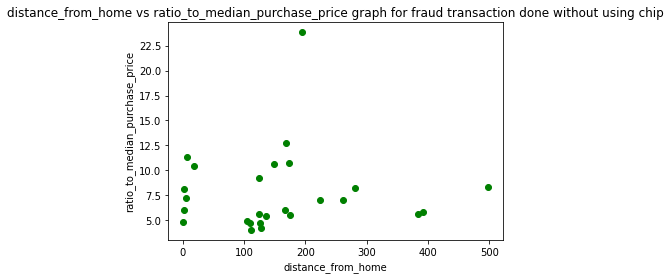

In [101]:
data1=data_set[data_set['used_chip']==0].copy()
data1=data1[data1['used_pin_number']!=0].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_home'],data1[data1['fraud']==1]['ratio_to_median_purchase_price'],color='green')
plt.xlabel('distance_from_home')
plt.ylabel('ratio_to_median_purchase_price')
plt.title('distance_from_home vs ratio_to_median_purchase_price graph for fraud transaction done without using chip')
plt.show()

# distance_from_home vs ratio_to_median_purchase_price graph for fraud transaction done without using pin number

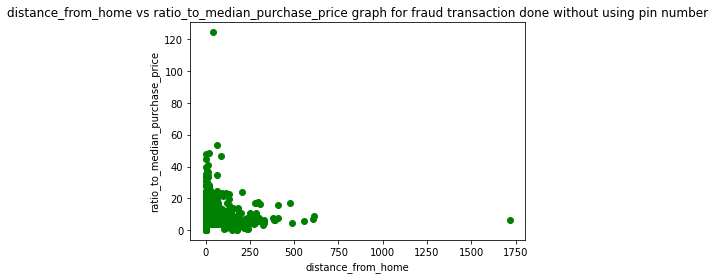

In [102]:
data1=data_set[data_set['used_chip']!=0].copy()
data1=data1[data1['used_pin_number']==0].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_home'],data1[data1['fraud']==1]['ratio_to_median_purchase_price'],color='green')
plt.xlabel('distance_from_home')
plt.ylabel('ratio_to_median_purchase_price')
plt.title('distance_from_home vs ratio_to_median_purchase_price graph for fraud transaction done without using pin number')
plt.show()

# distance_from_home vs ratio_to_median_purchase_price graph for fraud transaction done without using both chip and pin number

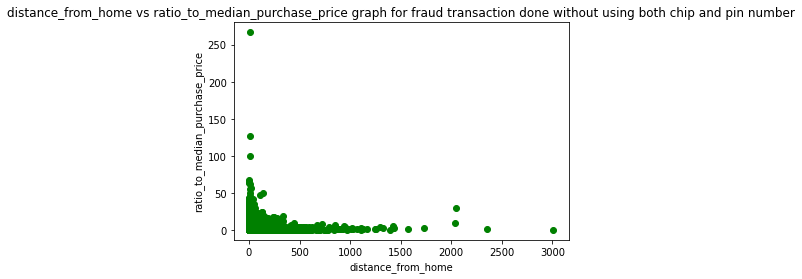

In [103]:
data1=data_set[data_set['used_chip']==0].copy()
data1=data1[data1['used_pin_number']==0].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_home'],data1[data1['fraud']==1]['ratio_to_median_purchase_price'],color='green')
plt.xlabel('distance_from_home')
plt.ylabel('ratio_to_median_purchase_price')
plt.title('distance_from_home vs ratio_to_median_purchase_price graph for fraud transaction done without using both chip and pin number')
plt.show()

# distance_from_home vs ratio_to_median_purchase_price graph for fraud transaction which is online ordered without using chip

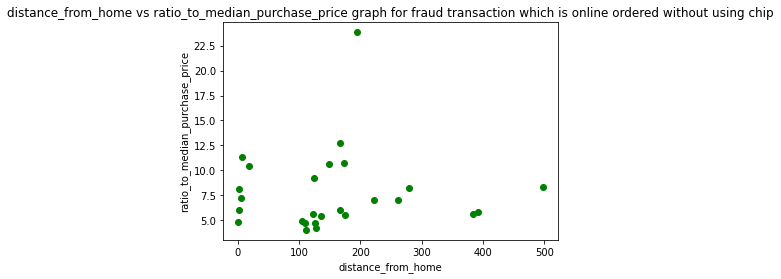

In [104]:
data1=data_set[data_set['used_pin_number']==1].copy()
data1=data1[data1['used_chip']==0].copy()
data1=data1[data1['online_order']==1].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_home'],data1[data1['fraud']==1]['ratio_to_median_purchase_price'],color='green')
plt.xlabel('distance_from_home')
plt.ylabel('ratio_to_median_purchase_price')
plt.title('distance_from_home vs ratio_to_median_purchase_price graph for fraud transaction which is online ordered without using chip')
plt.show()

# distance_from_home vs ratio_to_median_purchase_price graph for fraud transaction which is online ordered without using pin number

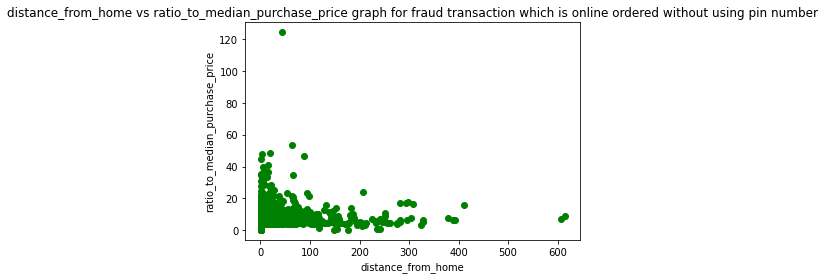

In [105]:
data1=data_set[data_set['used_pin_number']==0].copy()
data1=data1[data1['used_chip']==1].copy()
data1=data1[data1['online_order']==1].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_home'],data1[data1['fraud']==1]['ratio_to_median_purchase_price'],color='green')
plt.xlabel('distance_from_home')
plt.ylabel('ratio_to_median_purchase_price')
plt.title('distance_from_home vs ratio_to_median_purchase_price graph for fraud transaction which is online ordered without using pin number')
plt.show()

# distance_from_home vs ratio_to_median_purchase_price graph for fraud transaction which is online ordered without using both chip and pin number

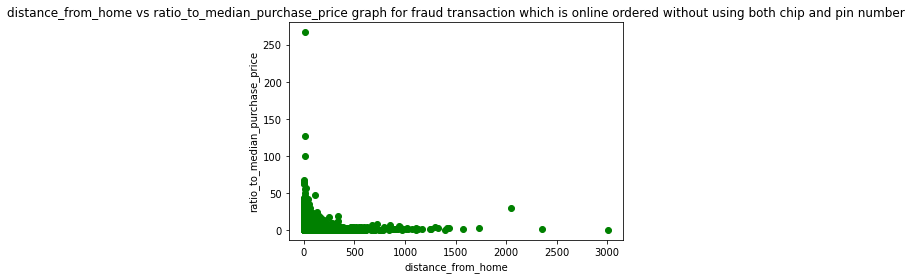

In [106]:
data1=data_set[data_set['used_pin_number']==0].copy()
data1=data1[data1['used_chip']==0].copy()
data1=data1[data1['online_order']==1].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_home'],data1[data1['fraud']==1]['ratio_to_median_purchase_price'],color='green')
plt.xlabel('distance_from_home')
plt.ylabel('ratio_to_median_purchase_price')
plt.title('distance_from_home vs ratio_to_median_purchase_price graph for fraud transaction which is online ordered without using both chip and pin number')
plt.show()

# distance_from_home vs ratio_to_median_purchase_price graph for fraud transaction by repeat_retailer without using chip

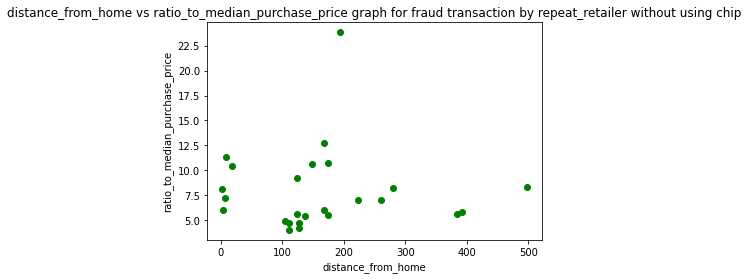

In [107]:
data1=data_set[data_set['used_pin_number']!=0].copy()
data1=data1[data1['used_chip']==0].copy()
data1=data1[data1['repeat_retailer']==1].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_home'],data1[data1['fraud']==1]['ratio_to_median_purchase_price'],color='green')
plt.xlabel('distance_from_home')
plt.ylabel('ratio_to_median_purchase_price')
plt.title('distance_from_home vs ratio_to_median_purchase_price graph for fraud transaction by repeat_retailer without using chip')
plt.show()

# distance_from_home vs ratio_to_median_purchase_price graph for fraud transaction by repeat_retailer without using pin number

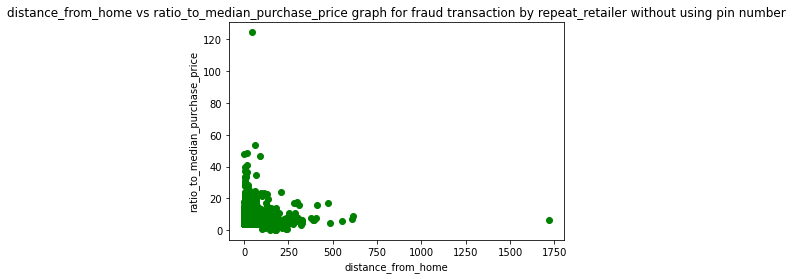

In [108]:
data1=data_set[data_set['used_pin_number']==0].copy()
data1=data1[data1['used_chip']!=0].copy()
data1=data1[data1['repeat_retailer']==1].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_home'],data1[data1['fraud']==1]['ratio_to_median_purchase_price'],color='green')
plt.xlabel('distance_from_home')
plt.ylabel('ratio_to_median_purchase_price')
plt.title('distance_from_home vs ratio_to_median_purchase_price graph for fraud transaction by repeat_retailer without using pin number')
plt.show()

# distance_from_home vs ratio_to_median_purchase_price graph for fraud transaction by repeat_retailer without using both chip and pin number

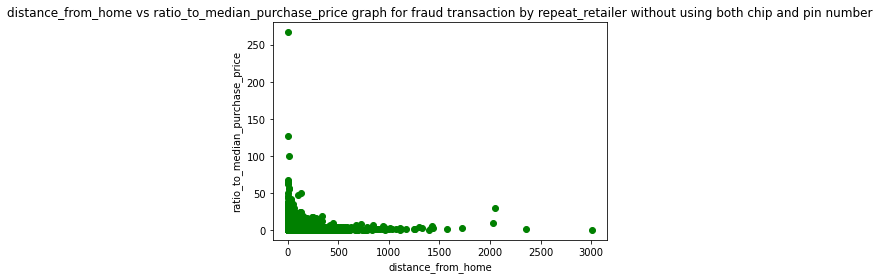

In [109]:
data1=data_set[data_set['used_pin_number']==0].copy()
data1=data1[data1['used_chip']==0].copy()
data1=data1[data1['repeat_retailer']==1].copy()
plt.scatter(data1[data1['fraud']==1]['distance_from_home'],data1[data1['fraud']==1]['ratio_to_median_purchase_price'],color='green')
plt.xlabel('distance_from_home')
plt.ylabel('ratio_to_median_purchase_price')
plt.title('distance_from_home vs ratio_to_median_purchase_price graph for fraud transaction by repeat_retailer without using both chip and pin number')
plt.show()

# Comparison of fraud detection cases without using only chip,pin number and without using both chip and pin number

In [110]:
data_not_used_chip=data_set[data_set['used_chip']==0].copy()
data_not_used_chip=len(data_not_used_chip[data_not_used_chip['used_pin_number']!=0].copy())
percentage_of_data_not_used_chip=int(data_not_used_chip/len(data_set)*100)
data_not_used_pin_number=data_set[data_set['used_pin_number']==0].copy()
data_not_used_pin_number=len(data_not_used_pin_number[data_not_used_pin_number['used_chip']!=0].copy())
percentage_of_data_not_used_pin_number=int(data_not_used_pin_number/len(data_set)*100)
data_not_used_both_chip_and_pin_number=data_set[data_set['used_chip']==0].copy()
data_not_used_both_chip_and_pin_number=len(data_not_used_both_chip_and_pin_number[data_not_used_both_chip_and_pin_number['used_pin_number']==0].copy())
percentage_of_data_not_used_both_chip_and_pin_number=int(data_not_used_both_chip_and_pin_number/len(data_set)*100)
data_used_both_chip_and_pin_number=data_set[data_set['used_chip']==1].copy()
data_used_both_chip_and_pin_number=len(data_used_both_chip_and_pin_number[data_used_both_chip_and_pin_number['used_pin_number']==1].copy())
percentage_of_data_used_both_chip_and_pin_number=int(data_used_both_chip_and_pin_number/len(data_set)*100)

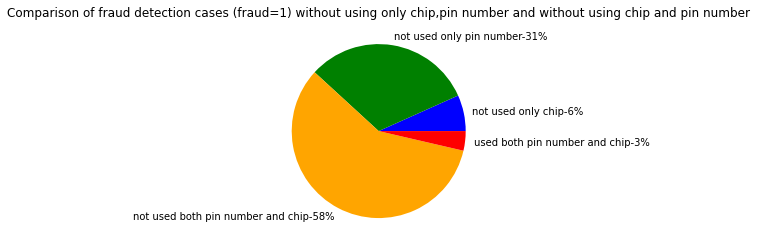

In [111]:
plt.pie([data_not_used_chip,data_not_used_pin_number,data_not_used_both_chip_and_pin_number,data_used_both_chip_and_pin_number],labels=['not used only chip-'+str(percentage_of_data_not_used_chip)+'%','not used only pin number-'+str(percentage_of_data_not_used_pin_number)+'%','not used both pin number and chip-'+str(percentage_of_data_not_used_both_chip_and_pin_number)+'%','used both pin number and chip-'+str(percentage_of_data_used_both_chip_and_pin_number)+'%'],colors=['blue','green','orange','red'])
plt.title('Comparison of fraud detection cases (fraud=1) without using only chip,pin number and without using chip and pin number')
plt.show()

# Boxplots of various features to detect outliers

In [112]:
import seaborn as sns

# distance_from_home

[(0.0, 100.0), Text(0.5, 1.0, 'Distance_from_home')]

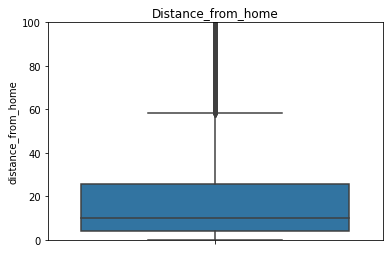

In [113]:
box=sns.boxplot(y=data_set['distance_from_home'])
box.set(title='Distance_from_home',ylim=(0,100))

# Boxplot for distance_from_home which is only fraud transaction cases

[(0.0, 500.0), Text(0.5, 1.0, 'Distance_from_home')]

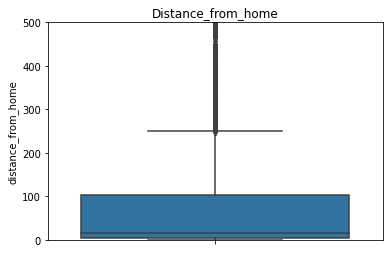

In [114]:
data1=data_set[data_set['fraud']==1].copy()
box=sns.boxplot(y=data1['distance_from_home'])
box.set(title='Distance_from_home',ylim=(0,500))

# Box plot for distance_from_home which is not fraud_transaction cases

[(0.0, 100.0), Text(0.5, 1.0, 'Distance_from_home')]

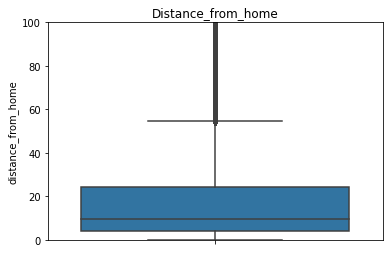

In [115]:
data1=data_set[data_set['fraud']==0].copy()
box=sns.boxplot(y=data1['distance_from_home'])
box.set(title='Distance_from_home',ylim=(0,100))

# distance_from_home box plot for not used chip and fraud transaction cases

[(0.0, 500.0), Text(0.5, 1.0, 'Distance_from_home')]

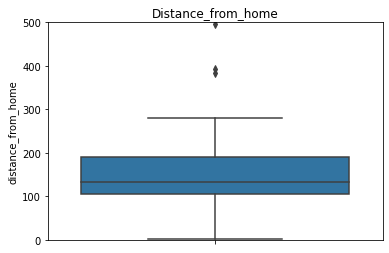

In [116]:
data1=data_set[data_set['fraud']==1].copy()
data1=data1[data1['used_chip']==0].copy()
data1=data1[data1['used_pin_number']!=0].copy()
box=sns.boxplot(y=data1['distance_from_home'])
box.set(title='Distance_from_home',ylim=(0,500))

# distance_from_home boxplot for not used pin number and fraud detected cases

[(0.0, 100.0), Text(0.5, 1.0, 'Distance_from_home')]

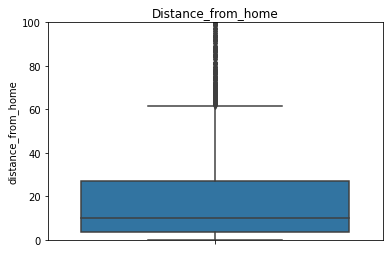

In [117]:
data1=data_set[data_set['fraud']==1].copy()
data1=data1[data1['used_chip']!=0].copy()
data1=data1[data1['used_pin_number']==0].copy()
box=sns.boxplot(y=data1['distance_from_home'])
box.set(title='Distance_from_home',ylim=(0,100))

# distance_from_home boxplot for not used both chip and pin number and fraud detected cases

[(0.0, 500.0), Text(0.5, 1.0, 'Distance_from_home')]

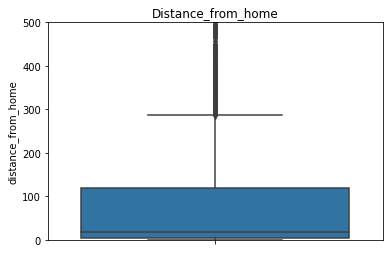

In [118]:
data1=data_set[data_set['fraud']==1].copy()
data1=data1[data1['used_chip']==0].copy()
data1=data1[data1['used_pin_number']==0].copy()
box=sns.boxplot(y=data1['distance_from_home'])
box.set(title='Distance_from_home',ylim=(0,500))

# Observation in boxplot of distance_from_home


*   There are outliers of higher values
*   Most of the outliers are from **fraud transaction cases**
*   The fraud detected cases which are present in outliers are mostly caused due to **not usage of chip**





# distance_from_last_transaction boxplot

[(0.0, 10.0), Text(0.5, 1.0, 'Distance_from_last_transaction')]

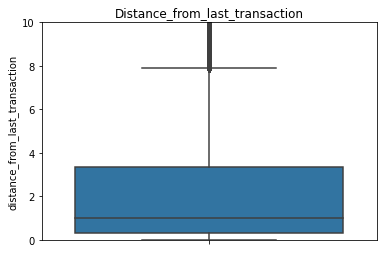

In [119]:
box=sns.boxplot(y=data_set['distance_from_last_transaction'])
box.set(title='Distance_from_last_transaction',ylim=(0,10))

# distance_from_transaction boxplot of fraud detected cases (fraud=1)

[(0.0, 5.0), Text(0.5, 1.0, 'Distance_from_last_transaction')]

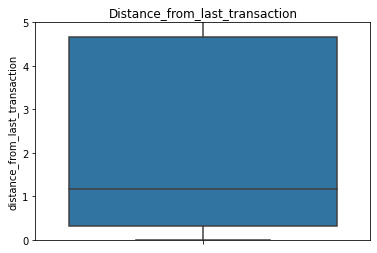

In [120]:
data1=data_set[data_set['fraud']==1].copy()
box=sns.boxplot(y=data1['distance_from_last_transaction'])
box.set(title='Distance_from_last_transaction',ylim=(0,5))

# distance_from_last_transaction box plot for not used chip and fraud transaction cases

[(0.0, 250.0), Text(0.5, 1.0, 'Distance_from_last_transaction')]

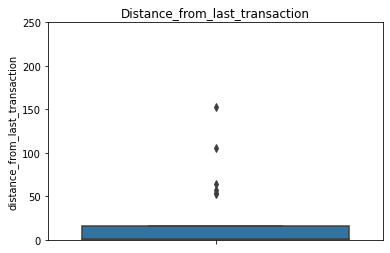

In [121]:
data1=data_set[data_set['fraud']==1].copy()
data1=data1[data1['used_chip']==0].copy()
data1=data1[data1['used_pin_number']!=0].copy()
box=sns.boxplot(y=data1['distance_from_last_transaction'])
box.set(title='Distance_from_last_transaction',ylim=(0,250))

# distance_from_last_transaction boxplot for not used pin number and fraud detected cases

[(0.0, 20.0), Text(0.5, 1.0, 'Distance_from_last_transaction')]

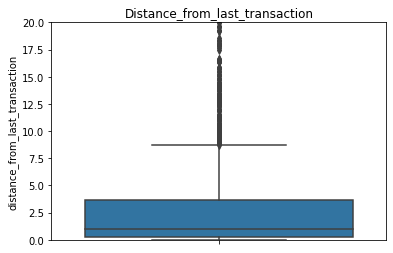

In [122]:
data1=data_set[data_set['fraud']==1].copy()
data1=data1[data1['used_chip']!=0].copy()
data1=data1[data1['used_pin_number']==0].copy()
box=sns.boxplot(y=data1['distance_from_last_transaction'])
box.set(title='Distance_from_last_transaction',ylim=(0,20))

# distance_from_last_transaction for not using both chip and pin number as well as fraud detected cases

[(0.0, 20.0), Text(0.5, 1.0, 'Distance_from_last_transaction')]

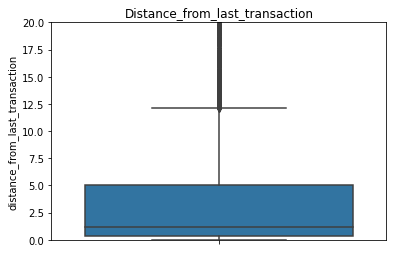

In [123]:
data1=data_set[data_set['fraud']==1].copy()
data1=data1[data1['used_chip']==0].copy()
data1=data1[data1['used_pin_number']==0].copy()
box=sns.boxplot(y=data1['distance_from_last_transaction'])
box.set(title='Distance_from_last_transaction',ylim=(0,20))

# Observation of distance_from_last_transaction boxplot
*   There are outliers of higher values
*   Most of the outliers are based on the condition not **used_chip**



# ratio_to_median_purchase_price boxplot

[(0.0, 8.0), Text(0.5, 1.0, 'ratio_to_median_purchase_price')]

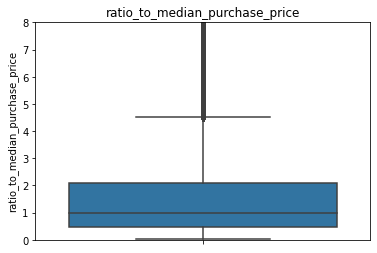

In [124]:
box=sns.boxplot(y=data_set['ratio_to_median_purchase_price'])
box.set(title='ratio_to_median_purchase_price',ylim=(0,8))

# ratio_to_median_purchase_price boxplot for fraud detected cases

[(0.0, 20.0), Text(0.5, 1.0, 'ratio_to_median_purchase_price')]

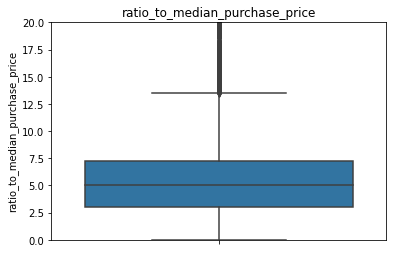

In [125]:
data1=data_set[data_set['fraud']==1].copy()
box=sns.boxplot(y=data1['ratio_to_median_purchase_price'])
box.set(title='ratio_to_median_purchase_price',ylim=(0,20))

# ratio_to_median_purchase_price boxplot for not used pin and fraud detected cases

[(0.0, 25.0), Text(0.5, 1.0, 'ratio_to_median_purchase_price')]

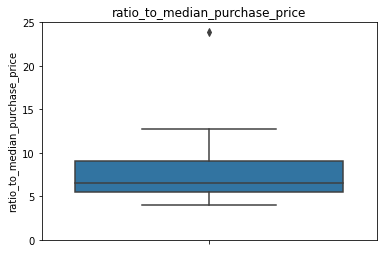

In [126]:
data1=data_set[data_set['fraud']==1].copy()
data1=data1[data1['used_chip']==0].copy()
data1=data1[data1['used_pin_number']!=0].copy()
box=sns.boxplot(y=data1['ratio_to_median_purchase_price'])
box.set(title='ratio_to_median_purchase_price',ylim=(0,25))

# ratio_to_median_purchase_price boxplot for not used pin number and fraud detected cases

[(0.0, 25.0), Text(0.5, 1.0, 'ratio_to_median_purchase_price')]

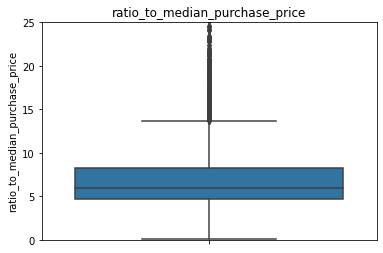

In [127]:
data1=data_set[data_set['fraud']==1].copy()
data1=data1[data1['used_chip']!=0].copy()
data1=data1[data1['used_pin_number']==0].copy()
box=sns.boxplot(y=data1['ratio_to_median_purchase_price'])
box.set(title='ratio_to_median_purchase_price',ylim=(0,25))

# ratio_to_median_purchase_price boxplot for not using both chip and pin number as well as fraud transaction cases

[(0.0, 25.0), Text(0.5, 1.0, 'ratio_to_median_purchase_price')]

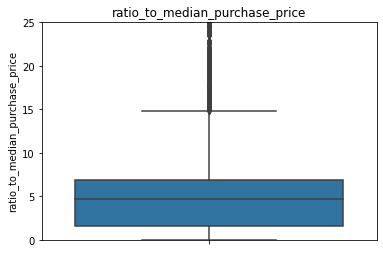

In [128]:
data1=data_set[data_set['fraud']==1].copy()
data1=data1[data1['used_chip']==0].copy()
data1=data1[data1['used_pin_number']==0].copy()
box=sns.boxplot(y=data1['ratio_to_median_purchase_price'])
box.set(title='ratio_to_median_purchase_price',ylim=(0,25))

# Observation ratio_median_purchase_price
*   There are outliers of higher values
*   Most of the outliers are **fraud detected cases and not using both chip and pin number**



# Replacing outlier values of distance_from_home feature

# Replacing distance_from_home outlier with lower and upper limit

In [129]:
data_set_outliers_with_limits=pandas.DataFrame(data_set).copy()
q1=data_set_outliers_with_limits['distance_from_home'].quantile(0.25)
q3=data_set_outliers_with_limits['distance_from_home'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
def replacing_outlier_with_limit(values):
  if values<lower_limit:
    return lower_limit
  elif values>upper_limit:
    return upper_limit
  return values
data_set_outliers_with_limits['distance_from_home']=data_set_outliers_with_limits['distance_from_home'].apply(replacing_outlier_with_limit)

# Taking the confusion matrix values to measure the accuracy after removing the outliers with upper limit

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [131]:
x=data_set_outliers_with_limits[list(data_set_outliers_with_limits.columns.values[:-1])]
y=data_set_outliers_with_limits['fraud'].values.reshape(-1,1)
train_data_x,test_data_x,train_data_y,test_data_y=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=0)
logistic=LogisticRegression().fit(train_data_x,train_data_y)
confusion_matrix_distance_from_home_with_upper_limit=metrics.confusion_matrix(test_data_y,logistic.predict(test_data_x))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Replacing distance_from_home outlier with mean of the values

In [132]:
data_set_outliers_with_mean=pandas.DataFrame(data_set).copy()
q1=data_set_outliers_with_mean['distance_from_home'].quantile(0.25)
q3=data_set_outliers_with_mean['distance_from_home'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
def replacing_outlier_with_mean(values):
  if values<lower_limit:
    return data_set_outliers_with_mean['distance_from_home'].mean()
  elif values>upper_limit:
    return data_set_outliers_with_mean['distance_from_home'].mean()
  return values 
data_set_outliers_with_mean['distance_from_home']=data_set_outliers_with_mean['distance_from_home'].apply(replacing_outlier_with_mean)

# Taking the confusion matrix values to observe the accuracy after removing the outliers with mean values

In [133]:
x=data_set_outliers_with_mean[list(data_set_outliers_with_mean.columns.values[:-1])]
y=data_set_outliers_with_mean['fraud'].values.reshape(-1,1)
train_data_x,test_data_x,train_data_y,test_data_y=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=0)
logistic=LogisticRegression().fit(train_data_x,train_data_y)
confusion_matrix_distance_from_home_with_mean=metrics.confusion_matrix(test_data_y,logistic.predict(test_data_x))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Replacing distance_from_home outlier with median of the values

In [134]:
data_set_outliers_with_median=pandas.DataFrame(data_set).copy()
q1=data_set_outliers_with_median['distance_from_home'].quantile(0.25)
q3=data_set_outliers_with_median['distance_from_home'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
def replacing_outlier_with_median(values):
  if values<lower_limit:
    return data_set_outliers_with_median['distance_from_home'].median()
  elif values>upper_limit:
    return data_set_outliers_with_median['distance_from_home'].median()
  return values 
data_set_outliers_with_median['distance_from_home']=data_set_outliers_with_median['distance_from_home'].apply(replacing_outlier_with_median)

# Taking the confusion matrix values to observe the accuracy after removing the outliers with median values

In [135]:
x=data_set_outliers_with_median[list(data_set_outliers_with_median.columns.values[:-1])]
y=data_set_outliers_with_median['fraud'].values.reshape(-1,1)
train_data_x,test_data_x,train_data_y,test_data_y=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=0)
logistic=LogisticRegression().fit(train_data_x,train_data_y)
confusion_matrix_distance_from_home_with_median=metrics.confusion_matrix(test_data_y,logistic.predict(test_data_x))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Comparison of confusion matrix values after replacing outliers with upper limit,mean,median of distance_from_home feature

In [136]:
print('confusion_matrix of distance_from_home feature with upper limit : ')
confusion_matrix_distance_from_home_with_upper_limit

confusion_matrix of distance_from_home feature with upper limit : 


array([[18065,   140],
       [  845,   950]])

In [137]:
print('confusion_matrix of distance_from_home feature with mean : ')
confusion_matrix_distance_from_home_with_mean

confusion_matrix of distance_from_home feature with mean : 


array([[18125,    80],
       [  883,   912]])

In [138]:
print('confusion_matrix of distance_from_home with median : ')
confusion_matrix_distance_from_home_with_median

confusion_matrix of distance_from_home with median : 


array([[18145,    60],
       [  880,   915]])

# Observation of confusion matrix values after replacing of distance_from_home outliers with their limits,mean and median


*   By observing the confusion matrix values,**Replacing the outlier with true positive** is showing slightly **high true positive** when compared to the other
*   True positive of outlier replaced by median is higher than other 
*   So,we can take outlier replaced by the mean in the dataset as a final dataset







# Taking the values which the outliers are removed by mean to the distance_from_home feature

In [139]:
data_set['distance_from_home']=data_set_outliers_with_mean['distance_from_home']

# Replacing outlier values of distance_from_last_transaction feature

# Replacing distance_from_last_transaction with lower and upper limit

In [140]:
data_set_outliers_with_limits1=pandas.DataFrame(data_set).copy()
q11=data_set_outliers_with_limits1['distance_from_last_transaction'].quantile(0.25)
q33=data_set_outliers_with_limits1['distance_from_last_transaction'].quantile(0.75)
iqr1=q33-q11
lower_limit1=q11-1.5*iqr1
upper_limit1=q33+1.5*iqr1
def replacing_outlier_with_limit1(values):
  if values<lower_limit1:
    return lower_limit1
  elif values>upper_limit1:
    return upper_limit1
  return values
data_set_outliers_with_limits1['distance_from_last_transaction']=data_set_outliers_with_limits1['distance_from_last_transaction'].apply(replacing_outlier_with_limit1)

# Taking the confusion matrix values to measure the accuracy after removing the outliers with upper limit

In [141]:
x=data_set_outliers_with_limits1[list(data_set_outliers_with_limits1.columns.values[:-1])]
y=data_set_outliers_with_limits1['fraud'].values.reshape(-1,1)
train_data_x,test_data_x,train_data_y,test_data_y=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=0)
logistic=LogisticRegression().fit(train_data_x,train_data_y)
confusion_matrix_distance_from_last_transaction_with_upper_limit=metrics.confusion_matrix(test_data_y,logistic.predict(test_data_x))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Replacing outliers values of distance_from_last_transaction feature with mean of the values

In [142]:
data_set_outliers_with_mean1=pandas.DataFrame(data_set).copy()
q11=data_set_outliers_with_mean1['distance_from_last_transaction'].quantile(0.25)
q33=data_set_outliers_with_mean1['distance_from_last_transaction'].quantile(0.75)
iqr1=q33-q11
lower_limit1=q11-1.5*iqr1
upper_limit1=q33+1.5*iqr1
def replacing_outlier_with_mean1(values):
  if values<lower_limit1:
    return data_set_outliers_with_mean1['distance_from_last_transaction'].mean()
  elif values>upper_limit1:
    return data_set_outliers_with_mean1['distance_from_last_transaction'].mean()
  return values 
data_set_outliers_with_mean1['distance_from_last_transaction']=data_set_outliers_with_mean1['distance_from_last_transaction'].apply(replacing_outlier_with_mean1)

# Taking the confusion matrix values to observe the accuracy after removing the outliers with mean values

In [143]:
x=data_set_outliers_with_mean1[list(data_set_outliers_with_mean1.columns.values[:-1])]
y=data_set_outliers_with_mean1['fraud'].values.reshape(-1,1)
train_data_x,test_data_x,train_data_y,test_data_y=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=0)
logistic=LogisticRegression().fit(train_data_x,train_data_y)
confusion_matrix_distance_from_last_transaction_with_mean=metrics.confusion_matrix(test_data_y,logistic.predict(test_data_x))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Replacing outliers of distance_from_last_transaction feature with median values

In [144]:
data_set_outliers_with_median1=pandas.DataFrame(data_set).copy()
q11=data_set_outliers_with_median1['distance_from_last_transaction'].quantile(0.25)
q33=data_set_outliers_with_median1['distance_from_last_transaction'].quantile(0.75)
iqr1=q33-q11
lower_limit1=q11-1.5*iqr1
upper_limit1=q33+1.5*iqr1
def replacing_outlier_with_median1(values):
  if values<lower_limit1:
    return data_set_outliers_with_median1['distance_from_last_transaction'].median()
  elif values>upper_limit1:
    return data_set_outliers_with_median1['distance_from_last_transaction'].median()
  return values 
data_set_outliers_with_median1['distance_from_last_transaction']=data_set_outliers_with_median1['distance_from_last_transaction'].apply(replacing_outlier_with_median1)

# Taking the confusion matrix values to observe the accuracy after removing the outliers with median values

In [145]:
x=data_set_outliers_with_median1[list(data_set_outliers_with_median1.columns.values[:-1])]
y=data_set_outliers_with_median1['fraud'].values.reshape(-1,1)
train_data_x,test_data_x,train_data_y,test_data_y=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=0)
logistic=LogisticRegression().fit(train_data_x,train_data_y)
confusion_matrix_distance_from_last_transaction_with_median=metrics.confusion_matrix(test_data_y,logistic.predict(test_data_x))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Comparison of confusion matrix values after replacing outliers with upper limit,mean,median of distance_from_last_transaction feature

In [146]:
print('confusion_matrix of distance_from last_transaction with upper limit : ')
confusion_matrix_distance_from_last_transaction_with_upper_limit

confusion_matrix of distance_from last_transaction with upper limit : 


array([[18133,    72],
       [  922,   873]])

In [147]:
print('confusion_matrix of distance_from last_transaction with mean : ')
confusion_matrix_distance_from_last_transaction_with_mean

confusion_matrix of distance_from last_transaction with mean : 


array([[18138,    67],
       [  912,   883]])

In [148]:
print('confusion_matrix of distance_from last_transaction with median : ')
confusion_matrix_distance_from_last_transaction_with_median

confusion_matrix of distance_from last_transaction with median : 


array([[18140,    65],
       [  922,   873]])

# Observation of confusion matrix values after replacing of distance_from_last_transaction outliers with their limits,mean and median


*   **Replacing the outlier with mean** is showing slightly **True positive** when compared to the replacing with mean and median
*   True positive of outlier replaced by median is higher than other two
*   So,we can take outlier replaced by the mean in the dataset as a final dataset due to **high true positive values**



# Taking the values which the outliers are removed by mean to the distance_from_last_transaction feature

In [149]:
data_set['distance_from_last_transaction']=data_set_outliers_with_mean1['distance_from_last_transaction']

# Replacing outlier values of ratio_to_median_purchase_price feature

# Replacing outliers of ratio_to_median_purchase_price with lower and upper_limits

In [150]:
data_set_outliers_with_limits11=pandas.DataFrame(data_set).copy()
q111=data_set_outliers_with_limits11['ratio_to_median_purchase_price'].quantile(0.25)
q333=data_set_outliers_with_limits11['ratio_to_median_purchase_price'].quantile(0.75)
iqr11=q333-q111
lower_limit11=q111-1.5*iqr11
upper_limit11=q333+1.5*iqr11
def replacing_outlier_with_limit11(values):
  if values<lower_limit11:
    return lower_limit11
  elif values>upper_limit11:
    return upper_limit11
  return values
data_set_outliers_with_limits11['ratio_to_median_purchase_price']=data_set_outliers_with_limits11['ratio_to_median_purchase_price'].apply(replacing_outlier_with_limit11)

# Taking the confusion matrix values to measure the accuracy after removing the outliers with upper limit

In [151]:
x=data_set_outliers_with_limits11[list(data_set_outliers_with_limits11.columns.values[:-1])]
y=data_set_outliers_with_limits11['fraud'].values.reshape(-1,1)
train_data_x,test_data_x,train_data_y,test_data_y=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=0)
logistic=LogisticRegression().fit(train_data_x,train_data_y)
confusion_matrix_ratio_to_median_purchase_price_with_upper_limit=metrics.confusion_matrix(test_data_y,logistic.predict(test_data_x))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Replacing outliers of ratio_to_median_purchase_price with mean of the values

In [152]:
data_set_outliers_with_mean11=pandas.DataFrame(data_set).copy()
q111=data_set_outliers_with_mean11['ratio_to_median_purchase_price'].quantile(0.25)
q333=data_set_outliers_with_mean11['ratio_to_median_purchase_price'].quantile(0.75)
iqr11=q333-q111
lower_limit11=q111-1.5*iqr11
upper_limit11=q333+1.5*iqr11
def replacing_outlier_with_mean11(values):
  if values<lower_limit11:
    return data_set_outliers_with_mean11['ratio_to_median_purchase_price'].mean()
  elif values>upper_limit11:
    return data_set_outliers_with_mean11['ratio_to_median_purchase_price'].mean()
  return values 
data_set_outliers_with_mean11['ratio_to_median_purchase_price']=data_set_outliers_with_mean11['ratio_to_median_purchase_price'].apply(replacing_outlier_with_mean11)

# Taking the confusion matrix values to observe the accuracy after removing the outliers with mean values

In [153]:
x=data_set_outliers_with_mean11[list(data_set_outliers_with_mean11.columns.values[:-1])]
y=data_set_outliers_with_mean11['fraud'].values.reshape(-1,1)
train_data_x,test_data_x,train_data_y,test_data_y=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=0)
logistic=LogisticRegression().fit(train_data_x,train_data_y)
confusion_matrix_ratio_to_median_purchase_price_with_mean=metrics.confusion_matrix(test_data_y,logistic.predict(test_data_x))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Replacing outliers of ratio_to_median_purchase_price with median of the values

In [154]:
data_set_outliers_with_median11=pandas.DataFrame(data_set).copy()
q111=data_set_outliers_with_median11['ratio_to_median_purchase_price'].quantile(0.25)
q333=data_set_outliers_with_median11['ratio_to_median_purchase_price'].quantile(0.75)
iqr11=q333-q111
lower_limit11=q111-1.5*iqr11
upper_limit11=q333+1.5*iqr11
def replacing_outlier_with_median11(values):
  if values<lower_limit11:
    return data_set_outliers_with_median11['ratio_to_median_purchase_price'].median()
  elif values>upper_limit11:
    return data_set_outliers_with_median11['ratio_to_median_purchase_price'].median()
  return values 
data_set_outliers_with_median11['ratio_to_median_purchase_price']=data_set_outliers_with_median11['ratio_to_median_purchase_price'].apply(replacing_outlier_with_median11)

# Taking the confusion matrix values to observe the accuracy after removing the outliers with median values

In [155]:
x=data_set_outliers_with_median11[list(data_set_outliers_with_median11.columns.values[:-1])]
y=data_set_outliers_with_median11['fraud'].values.reshape(-1,1)
train_data_x,test_data_x,train_data_y,test_data_y=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=0)
logistic=LogisticRegression().fit(train_data_x,train_data_y)
confusion_matrix_ratio_to_median_purchase_price_with_median=metrics.confusion_matrix(test_data_y,logistic.predict(test_data_x))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Comparison of confusion matrix values after replacing outliers with upper limit,mean,median of ratio_to_median_purchase_price feature

In [156]:
print('confusion_matrix of ratio_to_median_purchase_price with upper limit : ')
confusion_matrix_ratio_to_median_purchase_price_with_upper_limit

confusion_matrix of ratio_to_median_purchase_price with upper limit : 


array([[17947,   258],
       [  567,  1228]])

In [157]:
print('confusion_matrix of ratio_to_median_purchase_price with mean : ')
confusion_matrix_ratio_to_median_purchase_price_with_mean

confusion_matrix of ratio_to_median_purchase_price with mean : 


array([[18117,    88],
       [ 1657,   138]])

In [158]:
print('confusion_matrix of ratio_to_median_purchase_price with median : ')
confusion_matrix_ratio_to_median_purchase_price_with_median

confusion_matrix of ratio_to_median_purchase_price with median : 


array([[18205,     0],
       [ 1794,     1]])

# Observation of confusion matrix values after replacing of ratio_to_median_purchase_price outliers with their limits,mean and median


* By observing the confusion matrix values,replacing outliers with upper limit is most suitable method when compared to the other due to **lower False Negative** in confusion matrix



# Taking the values which the outliers are removed by upper limit to the ratio_to_median_purchase_price feature

In [159]:
data_set['ratio_to_median_purchase_price']=data_set_outliers_with_limits11['ratio_to_median_purchase_price']

# Boxplot of distance_from_home after removing outliers

[Text(0.5, 1.0, 'boxplot of distance_from_home after removing outliers')]

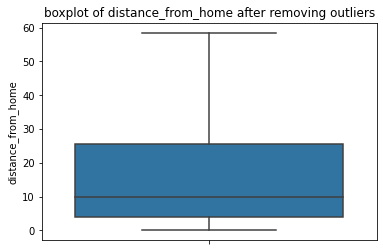

In [160]:
sns.boxplot(y=data_set['distance_from_home']).set(title='boxplot of distance_from_home after removing outliers')

# boxplot of distance_from_last_transaction after removing outliers

[Text(0.5, 1.0, 'boxplot of distance_from_last_transaction after removing outliers')]

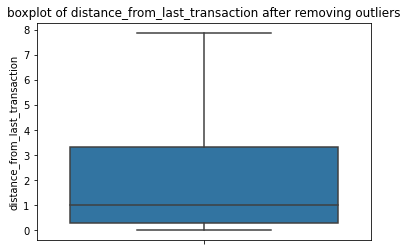

In [161]:
sns.boxplot(y=data_set['distance_from_last_transaction']).set(title='boxplot of distance_from_last_transaction after removing outliers')

# boxplot of ratio_to_median_purchase_price after removing outliers

[Text(0.5, 1.0, 'boxplot of ratio_to_median_purchase_price after removing outliers')]

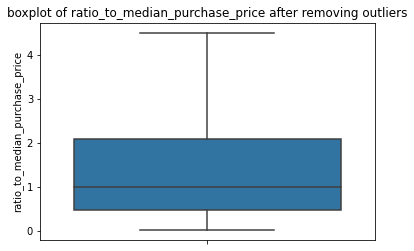

In [162]:
sns.boxplot(y=data_set['ratio_to_median_purchase_price']).set(title='boxplot of ratio_to_median_purchase_price after removing outliers')

# Feature Transformation

# Distribution of distance_from_home feature before feature transformation

Text(0.5, 1.0, 'Distribution of distance_from_home feature before feature transformation')

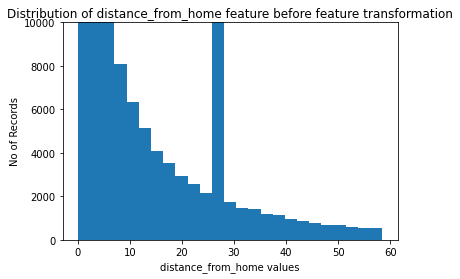

In [163]:
plt.hist(data_set['distance_from_home'],bins=25)
plt.ylim(0,10000)
plt.xlabel('distance_from_home values')
plt.ylabel('No of Records')
plt.title('Distribution of distance_from_home feature before feature transformation')

As the distribution of distance_from_home feature is right skewed.So,logarithemic operation is needed to be performed for normal distribution

In [164]:
def log_transform(values):
  return numpy.log(values)
data_set['distance_from_home']=data_set['distance_from_home'].apply(log_transform)

# Normal distribution of distance_from_home after applying feature transformation technique

Text(0.5, 1.0, 'Distribution of distance_from_home feature after applying feature transformation')

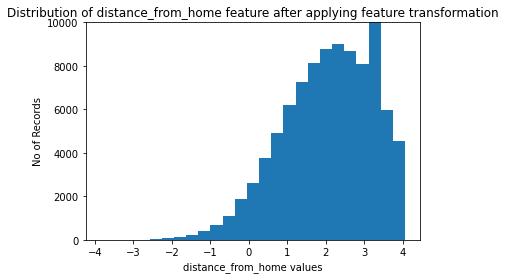

In [165]:
plt.hist(data_set['distance_from_home'],bins=25)
plt.ylim(0,10000)
plt.xlabel('distance_from_home values')
plt.ylabel('No of Records')
plt.title('Distribution of distance_from_home feature after applying feature transformation')

After applying feature transformation technique,distance_from_home feature is in normal distribution except the frequency as outliers are replaced by mean value.

# Distribution of distance_from_last_transaction feature before feature transformation

Text(0.5, 1.0, 'Distribution of distance_from_last_transaction feature before feature transformation')

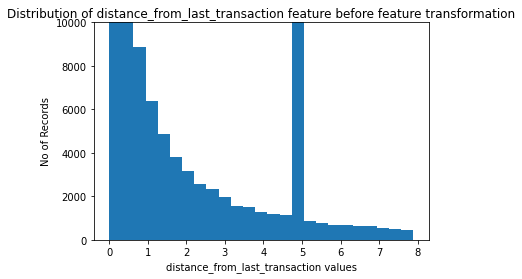

In [166]:
plt.hist(data_set['distance_from_last_transaction'],bins=25)
plt.ylim(0,10000)
plt.xlabel('distance_from_last_transaction values')
plt.ylabel('No of Records')
plt.title('Distribution of distance_from_last_transaction feature before feature transformation')

As the distribution of distance_from_last_transaction is right skewed.So,logarithemic operation is needed to be performed for normal distribution

In [167]:
def log_transform(values):
  return numpy.log(values)
data_set['distance_from_last_transaction']=data_set['distance_from_last_transaction'].apply(log_transform)

# Normal distribution of distance_from_last_transaction after applying feature transformation technique

Text(0.5, 1.0, 'Distribution of distance_from_last_transaction feature after applying feature transformation')

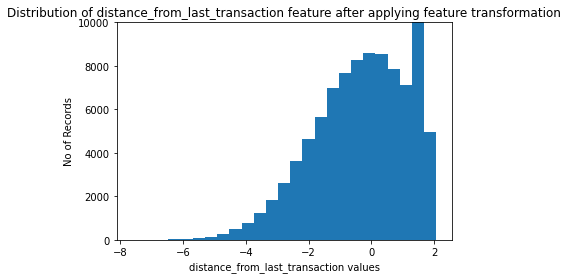

In [168]:
plt.hist(data_set['distance_from_last_transaction'],bins=25)
plt.ylim(0,10000)
plt.xlabel('distance_from_last_transaction values')
plt.ylabel('No of Records')
plt.title('Distribution of distance_from_last_transaction feature after applying feature transformation')

After applying feature transformation technique,distance_from_last_transaction feature is in normal distribution except the frequency which outliers are replaced by mean

# Distribution of ratio_to_median_purchase_price feature before feature transformation

Text(0.5, 1.0, 'ratio_to_median_purchase_price feature before feature transformation')

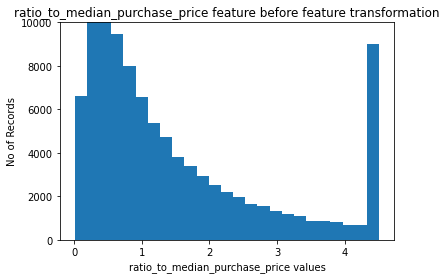

In [169]:
plt.hist(data_set['ratio_to_median_purchase_price'],bins=25)
plt.ylim(0,10000)
plt.xlabel('ratio_to_median_purchase_price values')
plt.ylabel('No of Records')
plt.title('ratio_to_median_purchase_price feature before feature transformation')

#As the distribution of ratio_to_median_purchase_price feature is right skewed.So,logarithemic operation is needed to be performed for normal distribution

In [170]:
def log_transform(values):
  return numpy.log(values)
data_set['ratio_to_median_purchase_price']=data_set['ratio_to_median_purchase_price'].apply(log_transform)

# Normal distribution of ratio_to_median_purchase_price after applying feature transformation technique

Text(0.5, 1.0, 'ratio_to_median_purchase_price feature after feature transformation')

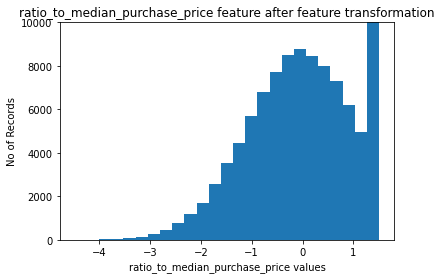

In [171]:
plt.hist(data_set['ratio_to_median_purchase_price'],bins=25)
plt.ylim(0,10000)
plt.xlabel('ratio_to_median_purchase_price values')
plt.ylabel('No of Records')
plt.title('ratio_to_median_purchase_price feature after feature transformation')

After applying feature transformation technique,ratio_to_median_purchase_price feature is in normal distribution except the frequency which outliers are replaced by upper limit

# Correlation between the features and target variable

In [172]:
data_set.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.001262,-0.001136,0.678992,-0.003062,-0.000932,0.000611,0.044872
distance_from_last_transaction,0.001262,1.000000,0.001454,-0.002270,-0.002375,0.001837,-0.005405,0.024287
ratio_to_median_purchase_price,-0.001136,0.001454,1.000000,-0.001705,0.000301,0.000730,0.004677,0.332331
repeat_retailer,0.678992,-0.002270,-0.001705,1.000000,-0.002641,-0.002301,0.003508,-0.002200
used_chip,-0.003062,-0.002375,0.000301,-0.002641,1.000000,-0.000048,-0.001629,-0.062392
used_pin_number,-0.000932,0.001837,0.000730,-0.002301,-0.000048,1.000000,0.000616,-0.101431
online_order,0.000611,-0.005405,0.004677,0.003508,-0.001629,0.000616,1.000000,0.192710
fraud,0.044872,0.024287,0.332331,-0.002200,-0.062392,-0.101431,0.192710,1.000000


# heatmap representation of the correlatiom of the dataset variables

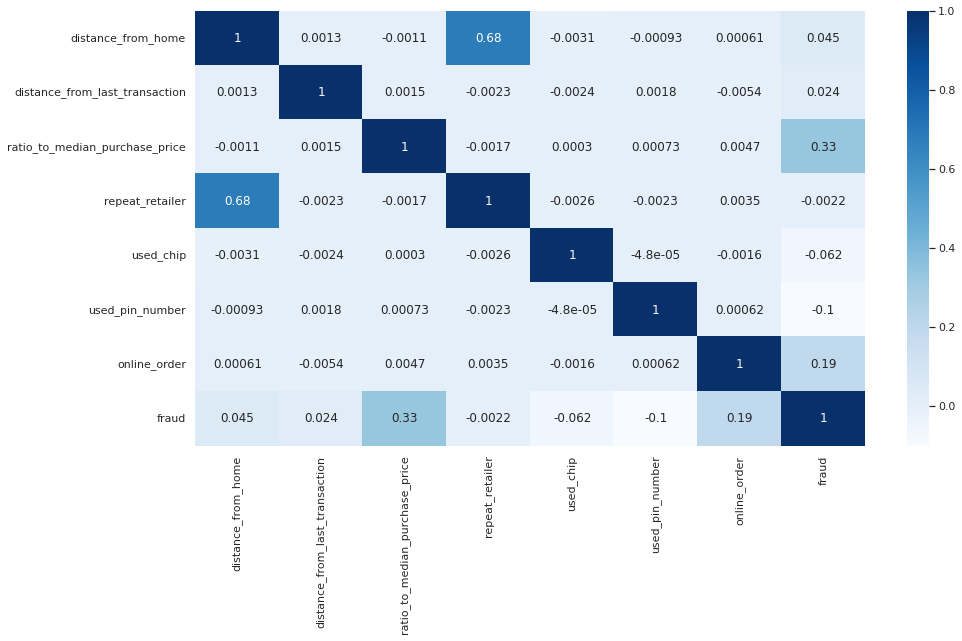

In [173]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(data_set.corr(),cmap="Blues",annot=True)

# Triangle Correlation Heatmap

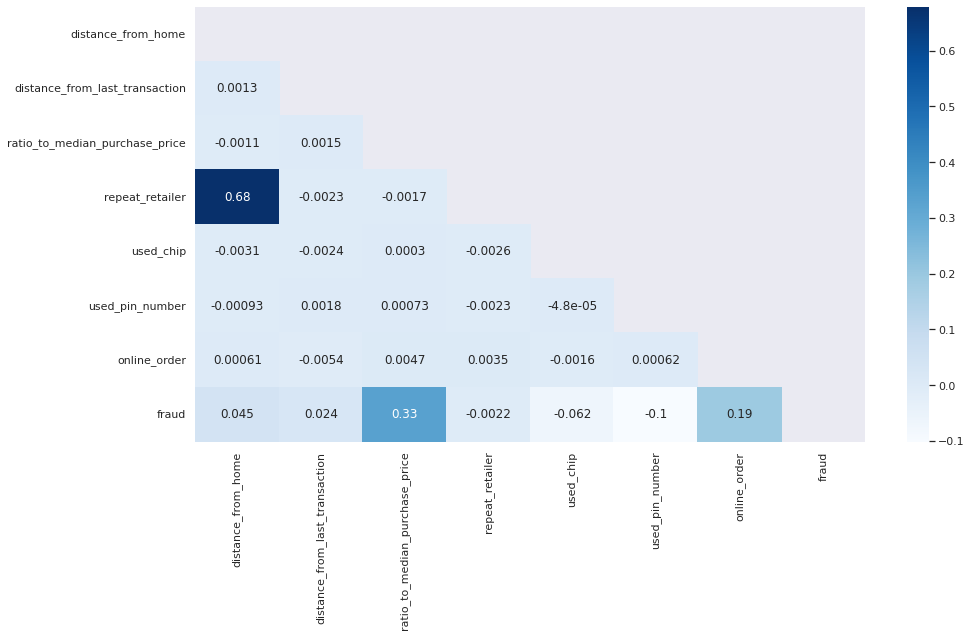

In [174]:
mask=numpy.triu(numpy.ones_like(data_set.corr()))
dataplot=sns.heatmap(data_set.corr(),annot=True,mask=mask,cmap='Blues')
sns.set_style('white')
plt.show()

# Conclusion in correlation heatmap:Fraud detection cases are more if ratio_to_median_purchase_price value increases,not using_of_pin_number and having online_order in some extent

* When coming to the target variable **fraud**,there is no strong relationship between **fraud** and any of the features
*  Target variable is having some positive relationship with **ratio_to_median_purchase_price(0.33)** and **little with online_order(0.19)**
*  The **fraud** is having negative relationship with **used_pin_number**
*  The negative relationship indicates that fraud transaction cases are causing due to **not using of pin numbers**
* It is having negligible relationship with **distance_from_home**,**distance_from_last_transaction** and **used_chip**
* The strong relationship among the overall heatmap is between **repeat_retailer** and **distance_from_home**(0.68).







# Featurescaling Techniques

*  Only the variables having continuous values namely **distance_from_home**,**distance_from_last_transaction**,**ratio_to_median_purchase_price** is to rescaled.
* There is no meaning in rescaling the variables which is having the values 0 and 1 







# Standard Scaler method

In [175]:
from sklearn.preprocessing import StandardScaler
standard_scaler_data_frame=data_set.copy()
standard_scaler_data_frame['distance_from_home']=StandardScaler().fit_transform(standard_scaler_data_frame['distance_from_home'].values.reshape(-1,1))
standard_scaler_data_frame['distance_from_last_transaction']=StandardScaler().fit_transform(standard_scaler_data_frame['distance_from_last_transaction'].values.reshape(-1,1))
standard_scaler_data_frame['ratio_to_median_purchase_price']=StandardScaler().fit_transform(standard_scaler_data_frame['ratio_to_median_purchase_price'].values.reshape(-1,1))

In [176]:
standard_scaler_data_frame.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,1.621082,-0.647598,0.698661,1,1,0,0,0
1,0.196442,-1.020156,0.297962,1,0,0,0,0
2,-0.445170,-0.028415,-0.789865,1,0,0,1,0
3,-1.140178,1.234647,-0.951961,1,1,0,1,0
4,1.391736,-0.257374,0.829341,1,1,0,1,0


# MinMaxScaler Method

In [177]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler_data_frame=data_set.copy()
minmax_scaler_data_frame['distance_from_home']=MinMaxScaler().fit_transform(minmax_scaler_data_frame['distance_from_home'].values.reshape(-1,1))
minmax_scaler_data_frame['distance_from_last_transaction']=MinMaxScaler().fit_transform(minmax_scaler_data_frame['distance_from_last_transaction'].values.reshape(-1,1))
minmax_scaler_data_frame['ratio_to_median_purchase_price']=MinMaxScaler().fit_transform(minmax_scaler_data_frame['ratio_to_median_purchase_price'].values.reshape(-1,1))
minmax_scaler_data_frame.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.998645,0.666410,0.859571,1,1,0,0,0
1,0.786948,0.607380,0.791397,1,0,0,0,0
2,0.691607,0.764516,0.606318,1,0,0,1,0
3,0.588331,0.964642,0.578740,1,1,0,1,0
4,0.964565,0.728239,0.881804,1,1,0,1,0


# Robust scale method

In [178]:
from sklearn.preprocessing import robust_scale
robust_scale_data_frame=data_set.copy()
robust_scale_data_frame['distance_from_home']=robust_scale(robust_scale_data_frame['distance_from_home'])
robust_scale_data_frame['distance_from_last_transaction']=robust_scale(robust_scale_data_frame['distance_from_last_transaction'])
robust_scale_data_frame['ratio_to_median_purchase_price']=robust_scale(robust_scale_data_frame['ratio_to_median_purchase_price'])
robust_scale_data_frame.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.928059,-0.480695,0.453030,1,1,0,0,0
1,0.043895,-0.716906,0.177130,1,0,0,0,0
2,-0.354304,-0.088118,-0.571890,1,0,0,1,0
3,-0.785641,0.712695,-0.683500,1,1,0,1,0
4,0.785721,-0.233283,0.543009,1,1,0,1,0


# MaxAbsScaler Method

In [179]:
from sklearn.preprocessing import MaxAbsScaler
maxabsscaler_data_frame=data_set.copy()
maxabsscaler_data_frame['distance_from_home']=MaxAbsScaler().fit_transform(maxabsscaler_data_frame['distance_from_home'].values.reshape(-1,1))
maxabsscaler_data_frame['distance_from_last_transaction']=MaxAbsScaler().fit_transform(maxabsscaler_data_frame['distance_from_last_transaction'].values.reshape(-1,1))
maxabsscaler_data_frame['ratio_to_median_purchase_price']=MaxAbsScaler().fit_transform(maxabsscaler_data_frame['ratio_to_median_purchase_price'].values.reshape(-1,1))
maxabsscaler_data_frame.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.997364,-0.153097,0.148720,1,1,0,0,0
1,0.585470,-0.228115,0.057614,1,0,0,0,0
2,0.399967,-0.028419,-0.189724,1,0,0,1,0
3,0.199026,0.225910,-0.226579,1,1,0,1,0
4,0.931055,-0.074522,0.178432,1,1,0,1,0


# Normalizing the data through Normalizer

In [180]:
from sklearn.preprocessing import Normalizer
normalizer_data_frame=data_set.copy()
normalizer_data_frame['distance_from_home']=Normalizer().fit_transform(normalizer_data_frame['distance_from_home'].values.reshape(-1,1))
normalizer_data_frame['distance_from_last_transaction']=Normalizer().fit_transform(normalizer_data_frame['distance_from_last_transaction'].values.reshape(-1,1))
normalizer_data_frame['ratio_to_median_purchase_ratio']=Normalizer().fit_transform(normalizer_data_frame['ratio_to_median_purchase_price'].values.reshape(-1,1))
normalizer_data_frame.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,ratio_to_median_purchase_ratio
0,1.0,-1.0,0.665745,1,1,0,0,0,1.0
1,1.0,-1.0,0.257907,1,0,0,0,0,1.0
2,1.0,-1.0,-0.849299,1,0,0,1,0,-1.0
3,1.0,1.0,-1.014282,1,1,0,1,0,-1.0
4,1.0,-1.0,0.798753,1,1,0,1,0,1.0


# Observation in performing various feature scaling techniques

* Rescaling the values through **MinMaxScaler method** is better when compared to the other methods because it is useful in verifying the variance of the features in dimensionality reduction technique.
* We cannot standardscaler method as it changes the variance to 1




In [181]:
data_set=minmax_scaler_data_frame

# Dataset after feature scaling

In [182]:
data_set.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.998645,0.666410,0.859571,1,1,0,0,0
1,0.786948,0.607380,0.791397,1,0,0,0,0
2,0.691607,0.764516,0.606318,1,0,0,1,0
3,0.588331,0.964642,0.578740,1,1,0,1,0
4,0.964565,0.728239,0.881804,1,1,0,1,0


# Dimensionality Reduction Technique

# Comparing the variance and remove the variables which is having low variance

* Minimum threshold of the variance is **1e-04** which is equal to **0.0001**.
* The variance of the continuous variable less than that threshold variance will be eliminated.
* The categorical variable which is having the values 0 and 1 will be removed if any of the value frequency distribution is more than **95%**




# Observing the Variance of the continuous variables

In [183]:
var=data_set[['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']].var()
var

distance_from_home                0.022081
distance_from_last_transaction    0.025105
ratio_to_median_purchase_price    0.028947
dtype: float64

In [184]:
t=1e-04
for i in var:
  if i<t:
    data_set.drop(columns=[var[var==i],index[0]],inplace=True)

In [185]:
var

distance_from_home                0.022081
distance_from_last_transaction    0.025105
ratio_to_median_purchase_price    0.028947
dtype: float64

All continous value variables variance are more than 1e-04.So,no features are eliminated

# Observing the frequency of the variable of categorical type

In [186]:
len(data_set[data_set['repeat_retailer']==1])/len(data_set)*100

88.209

In [187]:
len(data_set[data_set['used_chip']==1])/len(data_set)*100

35.106

In [188]:
len(data_set[data_set['used_pin_number']==1])/len(data_set)*100

10.325

In [189]:
len(data_set[data_set['online_order']==1])/len(data_set)*100

65.066

No categorical variable values frequency are more than 95%.So,no categorical type variables are removed

# Variance Inflation Factor

* If there is high correlation between two independent variable,then it is difficult to estimate which independent variable of that two impacts more on the target variable.It is calleds as **multicollinearity**
* If independent variable has variance inflation factor more than 5,then that variable will be removed
* After removing the variable,the variance inflation factor of other variable also changes.This process is continued till variance inflation factor of all the variable is less than 5.
* **It is applicable only for variables of continuous values.**







In [190]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def variance_inflation(X):
  op=pandas.DataFrame()
  op['variable']=X.columns
  op['vif value']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return(op)

In [191]:
x=data_set.drop('fraud',axis=1)
variance_inflation(x)

,variable,vif value
0,distance_from_home,36.793607
1,distance_from_last_transaction,16.654643
2,ratio_to_median_purchase_price,14.791729
3,repeat_retailer,15.533762
4,used_chip,1.528709
5,used_pin_number,1.113495
6,online_order,2.788809


VIF values for distance_from_home,distance_from_last_transcation,ratio_to_median_purchase_price,repeat_retailer are **>10**.

# Combining distance_from_home and distance_from_last_transaction by multiplication due to high variance_inflation_value

In [192]:
data_set['distance_from_home*distance_from_last_transaction']=data_set.apply(lambda x:x['distance_from_home']*x['distance_from_last_transaction'],axis=1)
data_set['distance_from_home*distance_from_last_transaction']

0        0.665507
1        0.477977
2        0.528745
3        0.567529
4        0.702434
           ...   
99995    0.525496
99996    0.803953
99997    0.627619
99998    0.918133
99999    0.338141
Name: distance_from_home*distance_from_last_transaction, Length: 100000, dtype: float64

# Dropping distance_from_home,distance_from_last_transaction and target variable fraud

In [193]:
x=data_set.drop(['distance_from_home','distance_from_last_transaction','fraud'],axis=1)

In [194]:
data_set.drop(['distance_from_home','distance_from_last_transaction'],axis=1,inplace=True)

# Checking variance_inflation after combining distance_from_home and distance_from_last_transaction

In [195]:
variance_inflation(x)

,variable,vif value
0,ratio_to_median_purchase_price,9.530486
1,repeat_retailer,10.294231
2,used_chip,1.517011
3,used_pin_number,1.111654
4,online_order,2.718549
5,distance_from_home*distance_from_last_transaction,13.777975


# Dropping repeat_retailer due to high variance inflation

In [196]:
x=data_set.drop(['repeat_retailer','fraud'],axis=1)

In [197]:
data_set.drop(['repeat_retailer'],axis=1,inplace=True)

# Checking variance_inflation after dropping repeat_retailer

In [198]:
variance_inflation(x)

,variable,vif value
0,ratio_to_median_purchase_price,9.053551
1,used_chip,1.515969
2,used_pin_number,1.111561
3,online_order,2.710015
4,distance_from_home*distance_from_last_transaction,8.502548


All independent variables are having vif value **<10**.

In [199]:
data_set.head()

,ratio_to_median_purchase_price,used_chip,used_pin_number,online_order,fraud,distance_from_home*distance_from_last_transaction
0,0.859571,1,0,0,0,0.665507
1,0.791397,0,0,0,0,0.477977
2,0.606318,0,0,1,0,0.528745
3,0.578740,1,0,1,0,0.567529
4,0.881804,1,0,1,0,0.702434


# Triangular correlation heatmap after performing dimensionality reduction technique

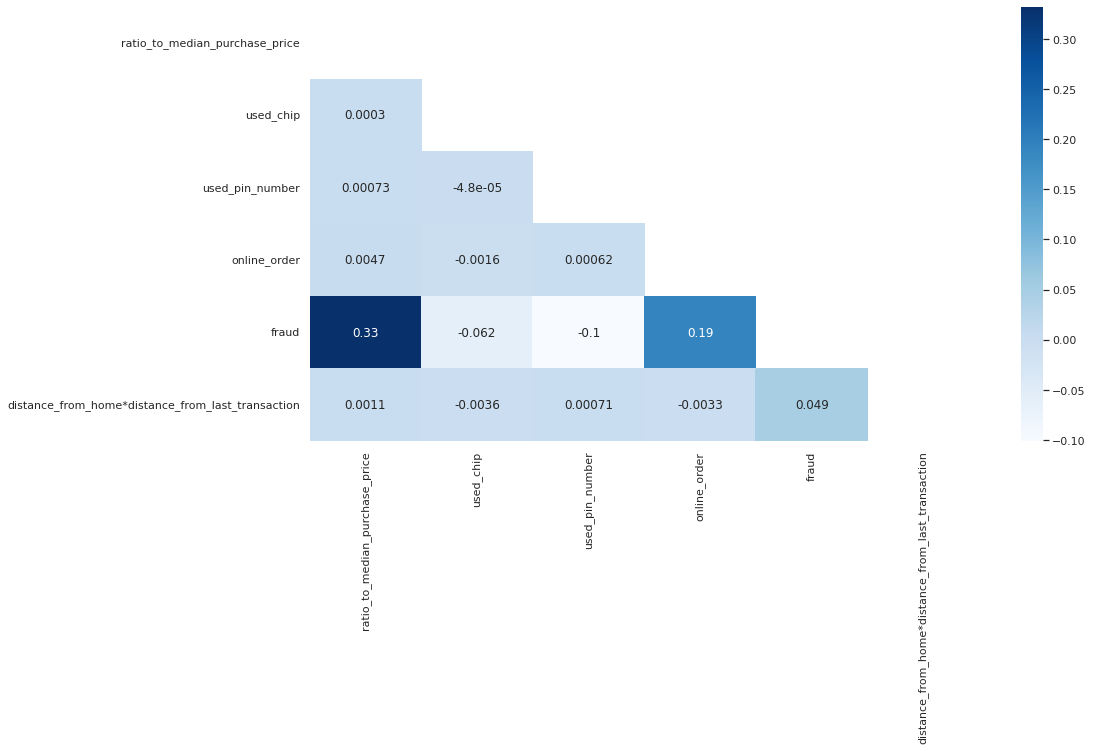

In [200]:
mask=numpy.triu(numpy.ones_like(data_set.corr()))
dataplot=sns.heatmap(data_set.corr(),annot=True,mask=mask,cmap='Blues')
sns.set_style('white')
plt.show()

# Conclusion by observing the heatmap after performing dimensionality reduction technique:As there is no change in relationship after performing dimensionality reduction technique with target variable because removed features have negligible relationship with target variable.Fraud detection cases are more if ratio_to_median_purchase_price is increased,not_using_of_pin_number and having online_order

*  Target variable fraud is having moderate relationship with ratio_to_median_purchase
*  Weak relationship with online_order
*  weak negative relationship with used_pin_number
*  Negligible relationship with used_chip and combined variable of the distance_from_home and distance_from_last_transaction  







# Selecting the training data and testing data

In [201]:
x=data_set[['ratio_to_median_purchase_price','used_chip','used_pin_number','online_order','distance_from_home*distance_from_last_transaction']]

In [202]:
y=data_set['fraud']

In [203]:
 train_data_x,test_data_x,train_data_y,test_data_y=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=0)

In [204]:
train_data_x['fraud']=train_data_y
train_data_x

,ratio_to_median_purchase_price,used_chip,used_pin_number,online_order,distance_from_home*distance_from_last_transaction,fraud
10382,0.911741,1,0,1,0.478360,0
73171,0.974620,1,0,1,0.705623,0
30938,0.969759,0,0,0,0.651677,0
99310,0.544284,0,0,1,0.273694,0
58959,0.742577,1,0,1,0.523083,0
...,...,...,...,...,...,...
21243,0.785249,0,0,0,0.436546,0
45891,0.897919,1,1,0,0.538310,0
42613,0.756197,0,0,1,0.696866,0
43567,0.896442,0,0,1,0.555903,0


In [205]:
train_data_x.to_csv('train_data.csv',index=False)

In [206]:
train_data_x.drop('fraud',axis=1,inplace=True)
test_data_x['fraud']=test_data_y
test_data_x.to_csv('test_data.csv',index=False)
test_data_x

,ratio_to_median_purchase_price,used_chip,used_pin_number,online_order,distance_from_home*distance_from_last_transaction,fraud
3582,1.000000,0,0,0,0.890549,0
60498,0.602338,0,1,0,0.573582,0
53227,0.793362,0,1,1,0.770104,0
21333,0.668430,0,0,1,0.751911,0
3885,0.458875,0,0,1,0.458869,0
...,...,...,...,...,...,...
60116,0.892221,0,0,1,0.402872,0
2415,0.805888,0,1,1,0.457073,0
43763,0.832860,0,1,0,0.736731,0
71345,0.936397,1,0,1,0.717064,0


In [207]:
test_data_x.drop('fraud',axis=1,inplace=True)

In [208]:
logistic=LogisticRegression().fit(train_data_x,train_data_y)

In [209]:
confusionmatrix=metrics.confusion_matrix(test_data_y,logistic.predict(test_data_x))

In [210]:
confusionmatrix

array([[18038,   167],
       [  941,   854]])

# By reducing the features,model got some improvement correctly predicted=>18038

# * correctly predicted=>18038+854=18892(94%)

# * wrongly predicted=>167+941=1,108(6%)